# External modules

In [2]:
options(tidyverse.quiet = TRUE)
options(caret.quiet = TRUE)
options(Hmisc.quiet = TRUE)
options(vroom.quiet = TRUE)

In [3]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




# Internal functions

In [5]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/read_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/load_functions.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/make_models.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/transform_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/calculate_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/save_multiple_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/extract_multiple_model_aic.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [6]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [8]:
data_path <- "./04_experimentation_01/merged_data.csv"

data <- xfun::in_dir(dir = path, expr = read_data(data_path))

In [9]:
str(data)

'data.frame':	22846 obs. of  52 variables:
 $ timestamp            : int  17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 17608320 ...
 $ latitude             : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude            : num  2.46 2.46 2.46 2.46 2.46 ...
 $ lateral_error        : num  -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error   : num  0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ latitude_error       : num  4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error      : num  1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ velocity_latitude    : num  -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude   : num  9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity             : num  5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ name_airplane        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench..group.   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n

## Outliers analysis

In [66]:
# transform data
response_var <- "longitudinal_error"

coefficient_iqr <- 3

data_object <- transform_data(data = data, 
                              response_var = response_var,
                              response_abs = TRUE,
                              scale_predictors = TRUE,
                              coefficient_iqr = coefficient_iqr, 
                              iterate = 20,
                              remove_outliers = FALSE,
                              method = c("interpolate", "mode", "median", "mean")[1])

In [67]:
iterate <- data_object$iterate

iterate

[1] 3

In [68]:
outlier_positions <- data_object$outlier_positions

outlier_positions

[1]  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359  2360
 [13]  2361  2362  2363  4810  4811  4812  4813  4814  4815  4816  4817  4818
 [25]  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830
 [37]  4831  4832  4833  4834  4835  4836  4837  4838  4839  4840  4841  4842
 [49]  4843  4844  4845  4846  4847  4848  4849  4850  4851  4852  4853  4854
 [61]  4855  4856  4857 16561 16562 16563 16564 16565 16566 16567 16586 16587
 [73] 16588 16589 16590 16591 16592 16607 16608 16609 16610 16611 16612 16613
 [85] 16614 16615 16616 16617 16618 16619 16620 16621 16622 16623 16624 16625
 [97] 16626 16627 16628 16629 16630 16631 16632 16633 16634 16635 16636 16637
[109] 16638 16639 16640 16641 16642 16643 16644 16645 16646 16647 16648 16649
[121] 16650 16651 16652 16653 16654 18387 18388 18389 18390 18391 18392 18393
[133] 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405
[145] 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416 18446
[157] 18447 18448 18449 18450 18451 18452 18453 18454 18455 18456 18457 18458
[169] 18459 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469 18470
[181] 18471 18472 18473 18474 18475 18476 18477 18478 18479 18480 18481 18482
[193] 18483 18484  4858 16593

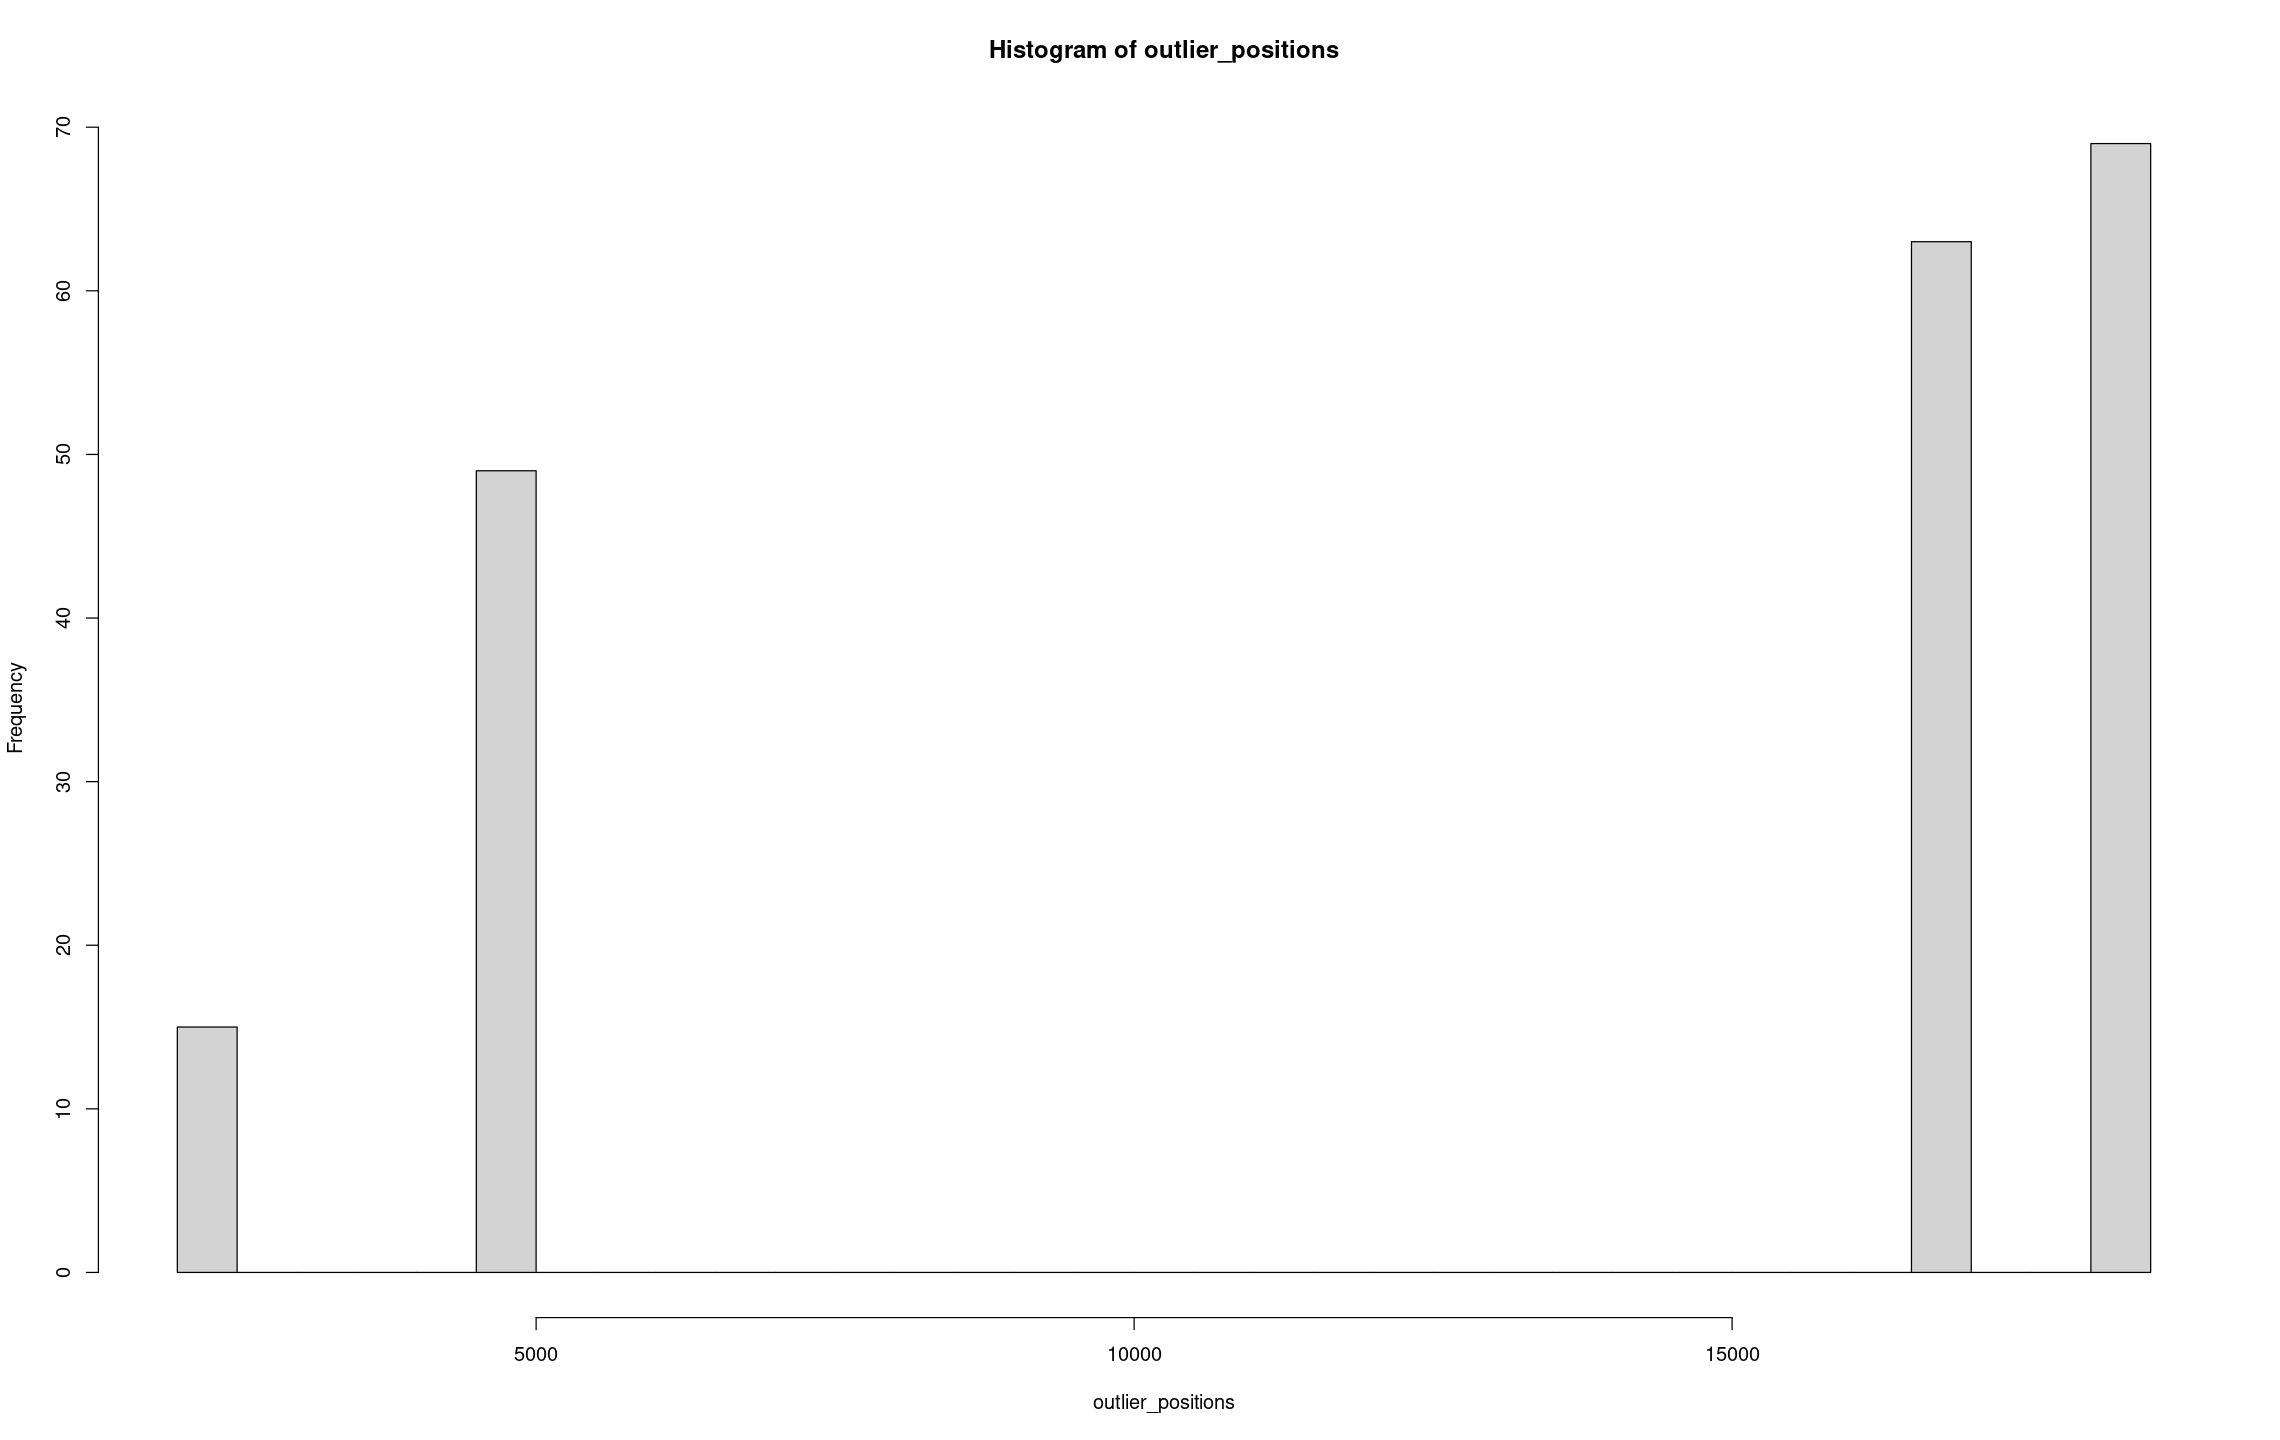

In [69]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

In [70]:
outlier_values <- data_object$outlier_values

outlier_values

[1]  1.0619071722  1.2714318037  1.3972645998  1.4857097864  1.5132539272
  [6]  1.4767574072  1.4287022352  1.3769536018  1.3414123058  1.2277728319
 [11]  1.1664361954  1.1265358925  1.0854136944  1.0381985903  0.9903909564
 [16] 10.2272338867 10.3930301666 10.4700031281 10.5277166367 10.3178043365
 [21] 10.1740903854  9.5864400864  9.1862611771  8.9715518951  8.6368684769
 [26]  8.2474985123  7.6923937797  7.0872220993  6.5260715485  5.9078426361
 [31]  4.6508173943  3.5918259621  3.3419492245  3.0456588268  2.7003188133
 [36]  2.3340377808  2.1061661243  1.9369181395  1.8737033606  1.4139106274
 [41]  1.3815729618  1.3648928404  1.3570761681  1.3085056543  1.2853083611
 [46]  1.2724838257  1.2445237637  1.2339601517  1.2234193087  1.2047049999
 [51]  1.1924086809  1.1747142076  1.1507555246  1.1362496614  1.1169966459
 [56]  1.1069709063  1.0954957008  1.0793623924  1.0427861214  1.0354821682
 [61]  1.0217481852  1.0059508085  0.9876871705  1.2612520456  1.3692269325
 [66]  1.4178088903  1.4461390972  1.4550588131  1.4400206804  1.4462069273
 [71]  1.5035313368  1.6941875219  1.7306541205  1.7020888329  1.5959874392
 [76]  1.3552482128  1.1336836815  1.2877625227  2.2590823173  2.7995483875
 [81]  4.0870575905  4.7172641754  5.0123295784  5.5926241875  5.6586642265
 [86]  5.6707077026  5.7511019707  5.8472261429  5.8878407478  5.9737195969
 [91]  6.1676979065  6.3024072647  6.5753755570  7.0262618065  8.6238355637
 [96]  9.8810224533 10.3383722305 10.2186603546 10.0763483047  9.9519510269
[101]  9.7481050491  9.5252447128  9.2780427933  9.1422147751  8.9675168991
[106]  8.8426704407  8.3922109604  8.2266874313  8.0607910156  7.6443834305
[111]  7.4169402123  7.2620143890  6.6156740189  6.0698733330  5.8848590851
[116]  5.6296844482  5.3850073814  5.2123823166  4.7630119324  4.5566334724
[121]  4.1010117531  3.9163088798  3.7193739414  2.8892714977  1.0180114508
[126]  2.5759909153  3.5449817181  3.8138108254  4.5732259750  5.6416611671
[131]  6.0668201447  6.3337502480  6.4809470177  6.8009057045  6.9190506935
[136]  7.0515499115  7.1770739555  7.3721261025  7.5047063828  7.6047606468
[141]  7.7455968857  7.9010643959  7.9438099861  7.9910106659  8.0550765991
[146]  8.1291675568  8.1607999802  8.1290330887  8.1262245178  8.1574125290
[151]  8.1992959976  8.0053377152  7.5684132576  3.3357551098  1.6933493614
[156]  1.0208622217  1.0460374355  1.0935559273  1.1288264990  1.2359898090
[161]  1.4003268480  1.4927412272  1.5760246515  1.5999617577  1.6475775242
[166]  1.6929807663  1.6969143152  1.6955505609  1.6541303396  1.6379508972
[171]  1.6263083220  1.6112343073  1.5950628519  1.5699051619  1.5458431244
[176]  1.5097486973  1.4721349478  1.4464032650  1.4293549061  1.4124915600
[181]  1.3848516941  1.3227902651  1.3083108664  1.2615370750  1.2427668571
[186]  1.2183926106  1.1520963907  1.1279358864  1.0980745554  1.0787267685
[191]  1.0654903650  1.0244600773  0.9979562163  0.9816219211  0.9679986238
[196]  0.9709490538

In [71]:
options(repr.plot.width=19, repr.plot.height=12)

describe(outlier_values)

outlier_values 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     196        0      196        1    4.026    3.451    1.024    1.089 
     .25      .50      .75      .90      .95 
   1.303    1.905    7.033    8.740    9.899 

lowest : 0.967999 0.970949 0.981622 0.987687 0.990391
highest: 10.3178  10.3384  10.393   10.47    10.5277 

In [72]:
outlier_substitutes <- data_object$outlier_substitutes

data.frame("outlier_values" = outlier_values, "outlier_substitutes" = outlier_substitutes)

outlier_values,outlier_substitutes
<dbl>,<dbl>
1.0619071722,0.6980719529
1.2714318037,0.7144911811
1.3972645998,0.7309104092
1.4857097864,0.7473296374
1.5132539272,0.7637488656
1.4767574072,0.7801680937
1.4287022352,0.7965873219
1.3769536018,0.8130065501
1.3414123058,0.8294257782


## Response variable

In [73]:
x <- data_object$response

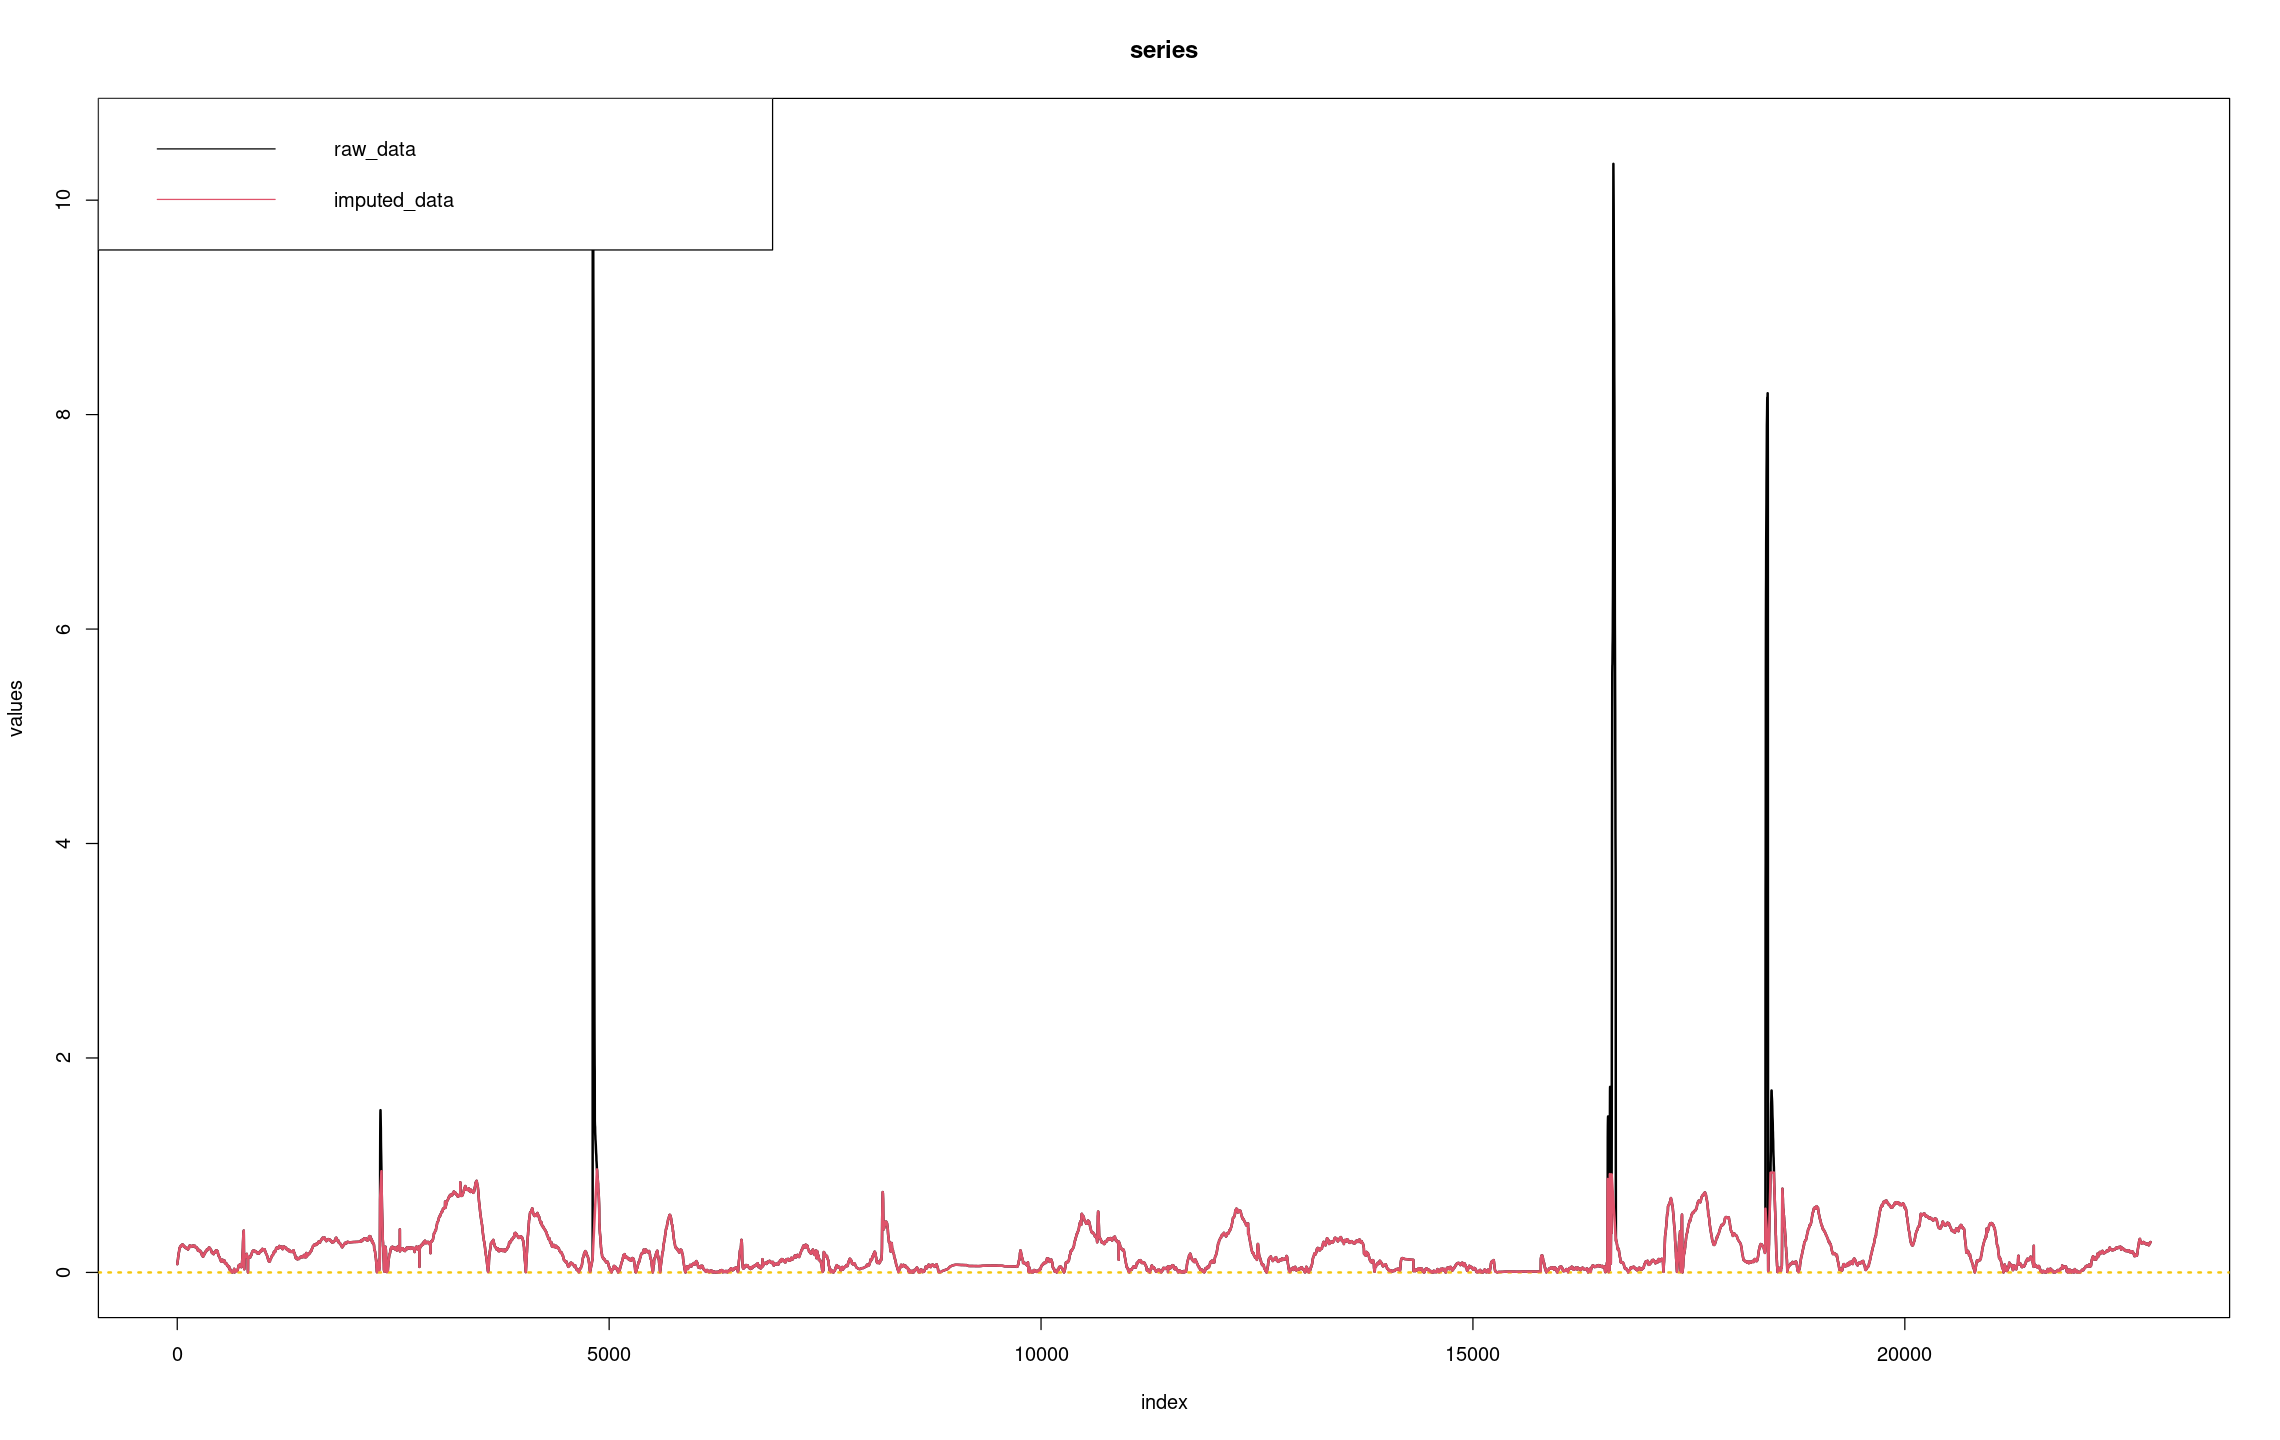

In [74]:
options(repr.plot.width=19, repr.plot.height=12)

plot(abs(data[, response_var]), 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")

abline(h = 0, lty = "dotted", col = 7, lwd = 2)

lines(x, col = 2, lwd = 2)

legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [75]:
describe(x)

x 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   22846        0    22576        1   0.1887   0.1938  0.00746  0.01549 
     .25      .50      .75      .90      .95 
 0.04758  0.12279  0.27882  0.46537  0.59601 

lowest : 3.40953e-06 1.5662e-05  2.06084e-05 3.4434e-05  4.45065e-05
highest: 0.94436     0.944524    0.946487    0.954828    0.961198   

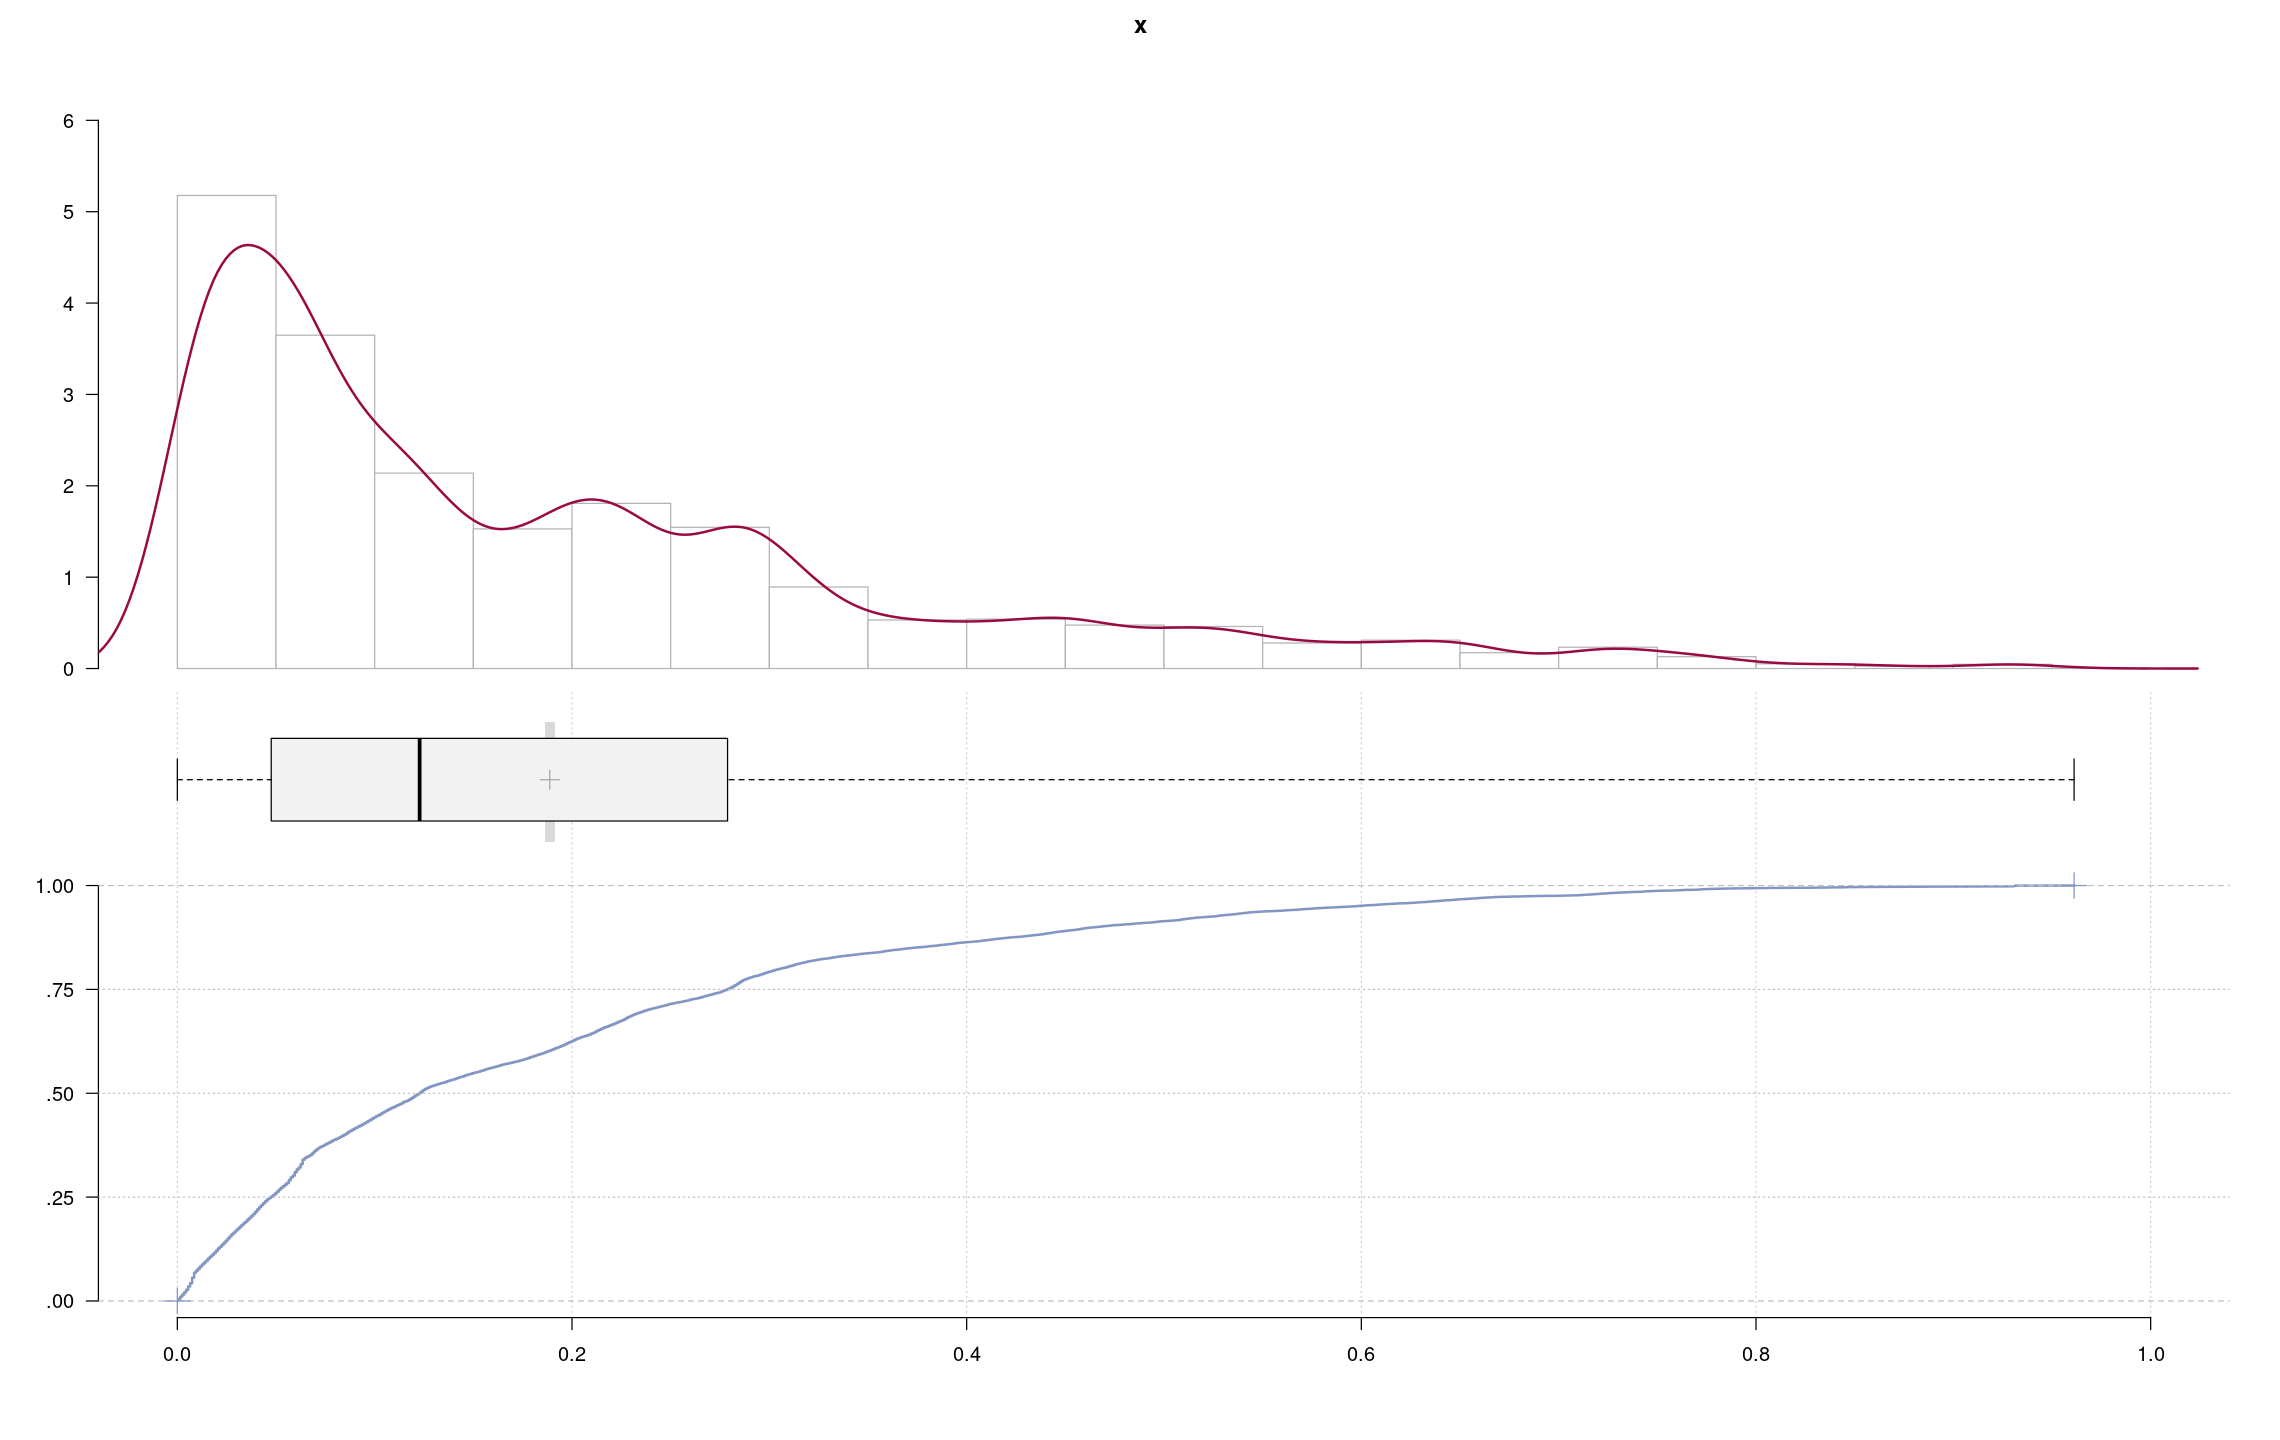

In [76]:
options(repr.plot.width=19, repr.plot.height=12)

PlotFdist(x = x, args.boxplot = list(range = coefficient_iqr))

In [77]:
nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
describe(y)

y 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   20000        0    19827        1   0.2142   0.1946  0.02981  0.03945 
     .25      .50      .75      .90      .95 
 0.06484  0.16019  0.29229  0.49595  0.61664 

lowest : 0.0207714 0.020773  0.0207762 0.0207957 0.0207962
highest: 0.94436   0.944524  0.946487  0.954828  0.961198 

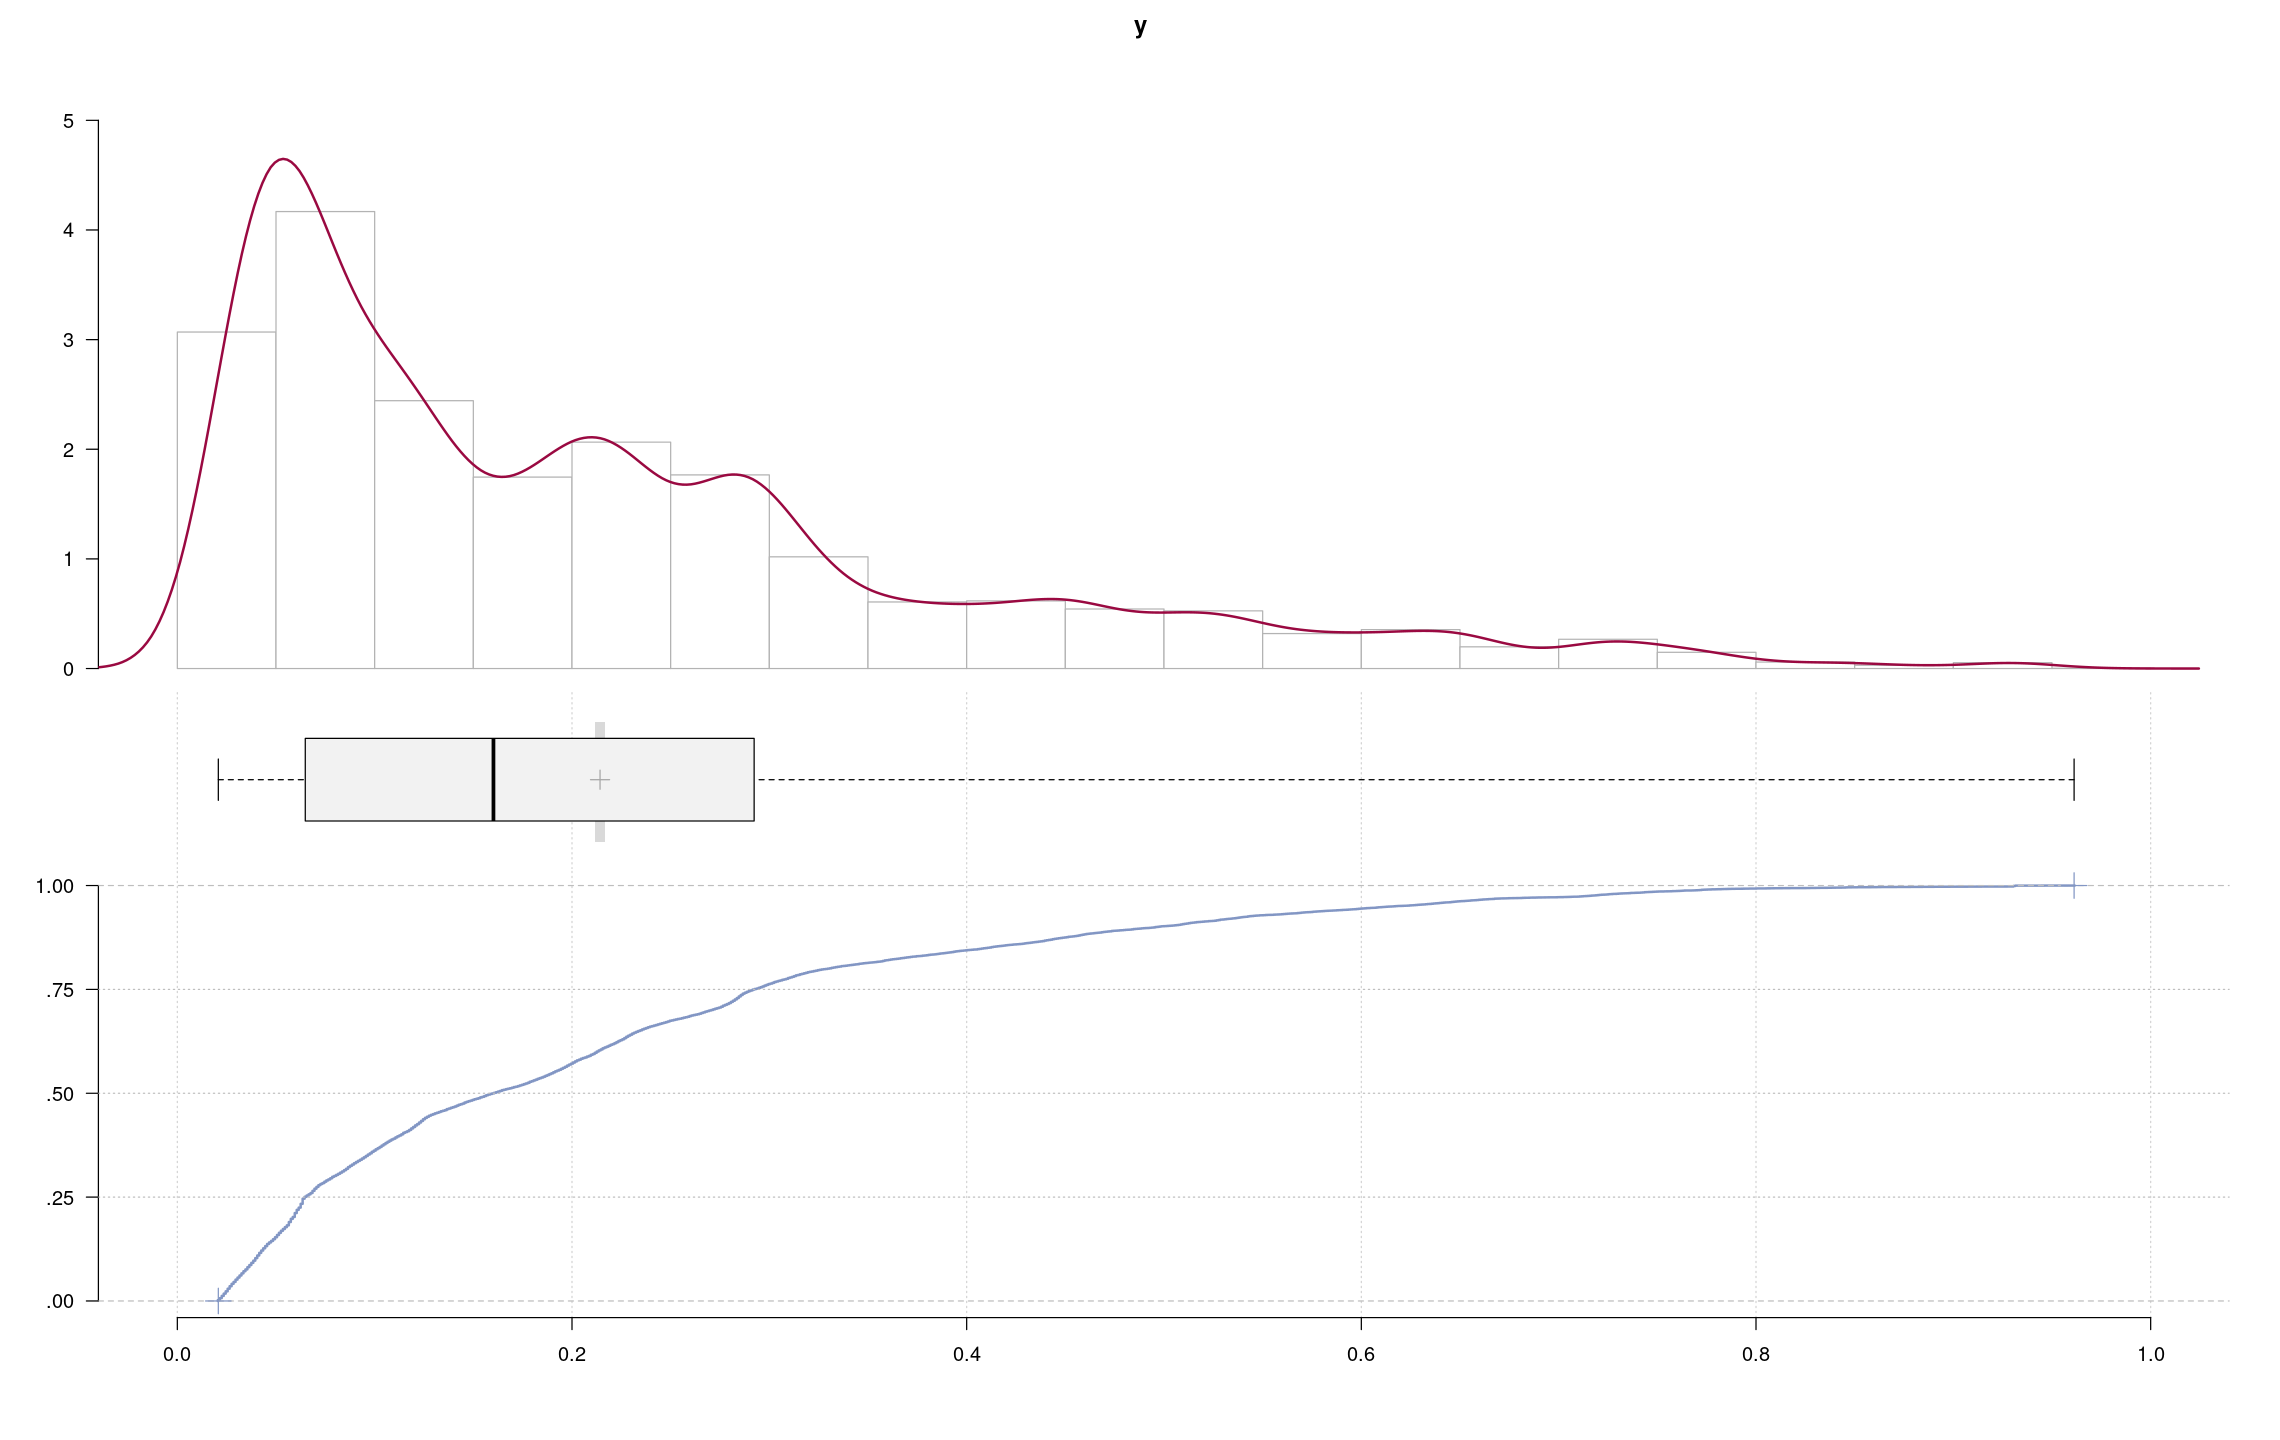

In [78]:
options(repr.plot.width=19, repr.plot.height=12)

PlotFdist(x = y, args.boxplot = list(range = coefficient_iqr))

## Predictor variables

In [79]:
detection_vars <- names(data)[c(11:45)]

data_covariates_detection <- data %>% select(all_of(detection_vars))

tail(data_covariates_detection)

,name_airplane,name_bench,name_bench..group.,name_bicycle,name_bird,name_bird..group.,name_boat,name_bus,name_car,name_car..group.,⋯,name_street.light,name_tenement,name_traffic.light,name_traffic.sign,name_train,name_tree,name_tree..group.,name_truck,name_tunnel,name_tunnel.entrance
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
22841,0,0,0,0,0,0,0,0,3,1,⋯,3,1,1,2,0,0,0,0,0,0
22842,0,0,0,0,0,0,0,1,5,1,⋯,2,2,0,2,0,0,2,1,0,0
22843,0,0,0,0,0,0,0,1,4,0,⋯,5,0,0,5,0,0,2,0,0,0
22844,0,1,0,0,0,0,0,1,3,1,⋯,4,2,0,3,0,1,2,1,0,0
22845,0,1,0,0,0,0,0,0,5,0,⋯,3,2,0,5,0,1,1,0,0,0
22846,0,0,0,0,0,0,0,1,5,1,⋯,2,1,1,3,0,1,1,1,0,0


In [80]:
detection_vars_counts <- apply(data_covariates_detection, 2, sum)

names(detection_vars_counts) <- names(data_covariates_detection)

data.frame("total" = sort(detection_vars_counts, decreasing = TRUE))

,total
,<int>
name_car,138255
name_street.light,110629
name_traffic.sign,103556
name_tree,77977
name_tenement,53488
name_tree..group.,45694
name_traffic.light,44228
name_electric.pole,38739
name_fence,34236


In [81]:
data_covariates <- data_object$predictors

str(data_covariates)

'data.frame':	22846 obs. of  42 variables:
 $ velocity             : num  -0.546 -0.788 -0.809 -0.56 -0.743 ...
 $ object               : num  -1.211 -1.122 -0.586 -1.301 -0.764 ...
 $ area                 : num  -0.598 -0.288 -0.521 -0.894 -0.882 ...
 $ horizontal_left      : num  -1.66 -1.52 -1.66 -1.81 -1.81 ...
 $ horizontal_right     : num  -0.263 -0.263 0.654 -0.263 0.523 ...
 $ vertical_down        : num  -1.147 -1.049 -0.461 -1.245 -0.657 ...
 $ vertical_up          : num  -0.699 -0.699 -0.699 -0.699 -0.699 ...
 $ name_airplane        : num  -0.258 -0.258 -0.258 -0.258 -0.258 ...
 $ name_bench           : num  -0.233 -0.233 -0.233 -0.233 -0.233 ...
 $ name_bench..group.   : num  -0.0945 -0.0945 -0.0945 -0.0945 -0.0945 ...
 $ name_bicycle         : num  -0.268 -0.268 -0.268 -0.268 -0.268 ...
 $ name_bird            : num  -0.108 -0.108 -0.108 -0.108 -0.108 ...
 $ name_bird..group.    : num  -0.00936 -0.00936 -0.00936 -0.00936 -0.00936 ...
 $ name_boat            : num  -0.0684 -

# Model selection

## Candidate block sizes

In [27]:
z <- y

In [28]:
minimum_block_size <- find_minimum_block_size(x = z, threshold = min(z))

print(minimum_block_size)

[1] 3


In [29]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x = z, m = 50)

print(maximum_block_size)

[1] 400


In [30]:
maxima <- extract_block_maxima(x = z, block_size = minimum_block_size)

print(min(maxima))

[1] 0.09695527703


In [31]:
print(median(z))

[1] 0.39470613


In [32]:
print(calculate_mode(z))

[1] 0.1579132969


In [33]:
candidate_block_sizes <- get_candidate_block_sizes(x = z, threshold = min(z), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Candidate models

In [38]:
models_object <- c(list("model_00" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_01" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_02" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_04" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_05" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_07" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),
                        
                        "model_08" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_09" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_10" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_12" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_14" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),
                        
                        "model_15" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_19" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_20" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_21" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        "model_23" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_25" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_26" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_27" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        
                        "model_29" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        "model_30" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_31" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_33" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_34" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_35" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        
                        "model_36" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        "model_37" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_40" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_41" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_42" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        
                        "model_43" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        "model_44" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_45" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_46" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_47" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_48" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_49" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        
                        "model_50" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        "model_51" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_52" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_53" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_54" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_55" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_56" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        
                        "model_57" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        "model_58" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_59" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_60" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_61" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_62" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_63" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        
                        "model_64" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        "model_65" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_66" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_67" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_68" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_69" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_70" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        
                        "model_71" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        "model_72" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_73" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_74" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_75" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_76" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_77" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        
                        "model_78" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        "model_79" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_80" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_81" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_82" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_83" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_84" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        
                        "model_85" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        "model_86" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_87" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_88" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_89" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_90" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_91" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        
                        "model_92" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        "model_93" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_94" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_95" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_96" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_97" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_98" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        
                        "model_99" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        "model_100" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_101" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_102" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_103" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_104" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_105" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        
                        "model_106" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        "model_107" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_108" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_109" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_110" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_111" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_112" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        
                        "model_113" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        "model_114" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_115" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_116" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_117" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_118" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_119" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        
                        "model_120" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        "model_121" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_122" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_123" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_124" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_125" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_126" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        
                        "model_127" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        "model_128" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_129" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_130" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_131" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_132" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_133" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        
                        "model_134" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        "model_135" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_136" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_137" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_138" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_139" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_140" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        
                        "model_141" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        "model_142" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_143" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_144" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_145" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_146" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_147" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        
                        "model_148" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        "model_149" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_150" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_151" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_152" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_153" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_154" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        
                        "model_155" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building),
                        "model_156" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_157" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_158" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_159" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_160" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_161" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building)))


# Best model

## Identification

In [82]:
aic_path <- "./04_experimentation_01/longitudinal_error_model_aic.csv"

fitted_models_information <- xfun::in_dir(dir = path, expr = read_data(aic_path))

In [84]:
rank <- order(fitted_models_information$BIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_04,~1,~1,~horizontal_right,-43930.74510,-41449.05001,horizontal_right
model_04,~1,~1,~object,-38548.35744,-36619.90648,object
model_04,~1,~1,~vertical_down,-38408.98384,-36441.01544,vertical_down
model_06,~object,~1,~object,-38310.64438,-35947.50160,object
model_01,~horizontal_right,~horizontal_right,~horizontal_right,-39209.77664,-35566.26888,horizontal_right
model_06,~vertical_down,~1,~vertical_down,-37339.46424,-35023.74239,vertical_down
model_04,~1,~1,~name_tree..group.,-36627.48907,-34857.10786,name_tree..group.
model_06,~velocity,~1,~velocity,-37139.63011,-34539.38271,velocity
model_06,~name_traffic.sign,~1,~name_traffic.sign,-37467.15623,-34487.54142,name_traffic.sign


In [85]:
model_position <- which(fitted_models_information_sorted$model_names == "model_02" &
                        fitted_models_information_sorted$variable == "horizontal_right")

selected_model <- fitted_models_information_sorted |> slice(model_position)

selected_model

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_02,~horizontal_right,~1,~1,-30587.76735,-29094.0082,horizontal_right


In [86]:
selected_model_variable <- selected_model$variable

selected_model_variable

[1] "horizontal_right"

## Estimation

In [87]:
use.phi <- TRUE
nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(y)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

In [88]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
                                                                    data = data_covariates,
                                                                    location.fun = as.formula(selected_model$location.fun),
                                                                    scale.fun = as.formula(selected_model$scale.fun),
                                                                    shape.fun = as.formula(selected_model$shape.fun),
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [89]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [90]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>
3,0.1076526586,-0.002500812039,0.09004224382,0.53697794395
4,0.1090692111,-0.002754126698,0.09055920911,0.53088322326
5,0.1099271960,-0.002832889007,0.09073714619,0.53363501231
6,0.1109304266,-0.002587545424,0.09119825913,0.53103171472
7,0.1119893972,-0.002259517044,0.09154069340,0.52965578166
10,0.1146775799,-0.002657535162,0.09282969079,0.52471570644
12,0.1168327764,-0.002639983540,0.09380381464,0.51434245201
13,0.1176025518,-0.003025466234,0.09391905439,0.51520736695
16,0.1205618154,-0.003351585710,0.09550762322,0.50284654566


In [91]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
3,0.0033079390537
4,0.0157878909383
5,0.0029069767442
6,0.0037590216520
7,0.0188953488372
10,0.0163893344026
12,0.0130813953488
13,0.0003007217322
16,0.0002506014435


In [92]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

180 
 19

In [93]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC        BIC 
-30587.767 -29094.008

## Diagnostic

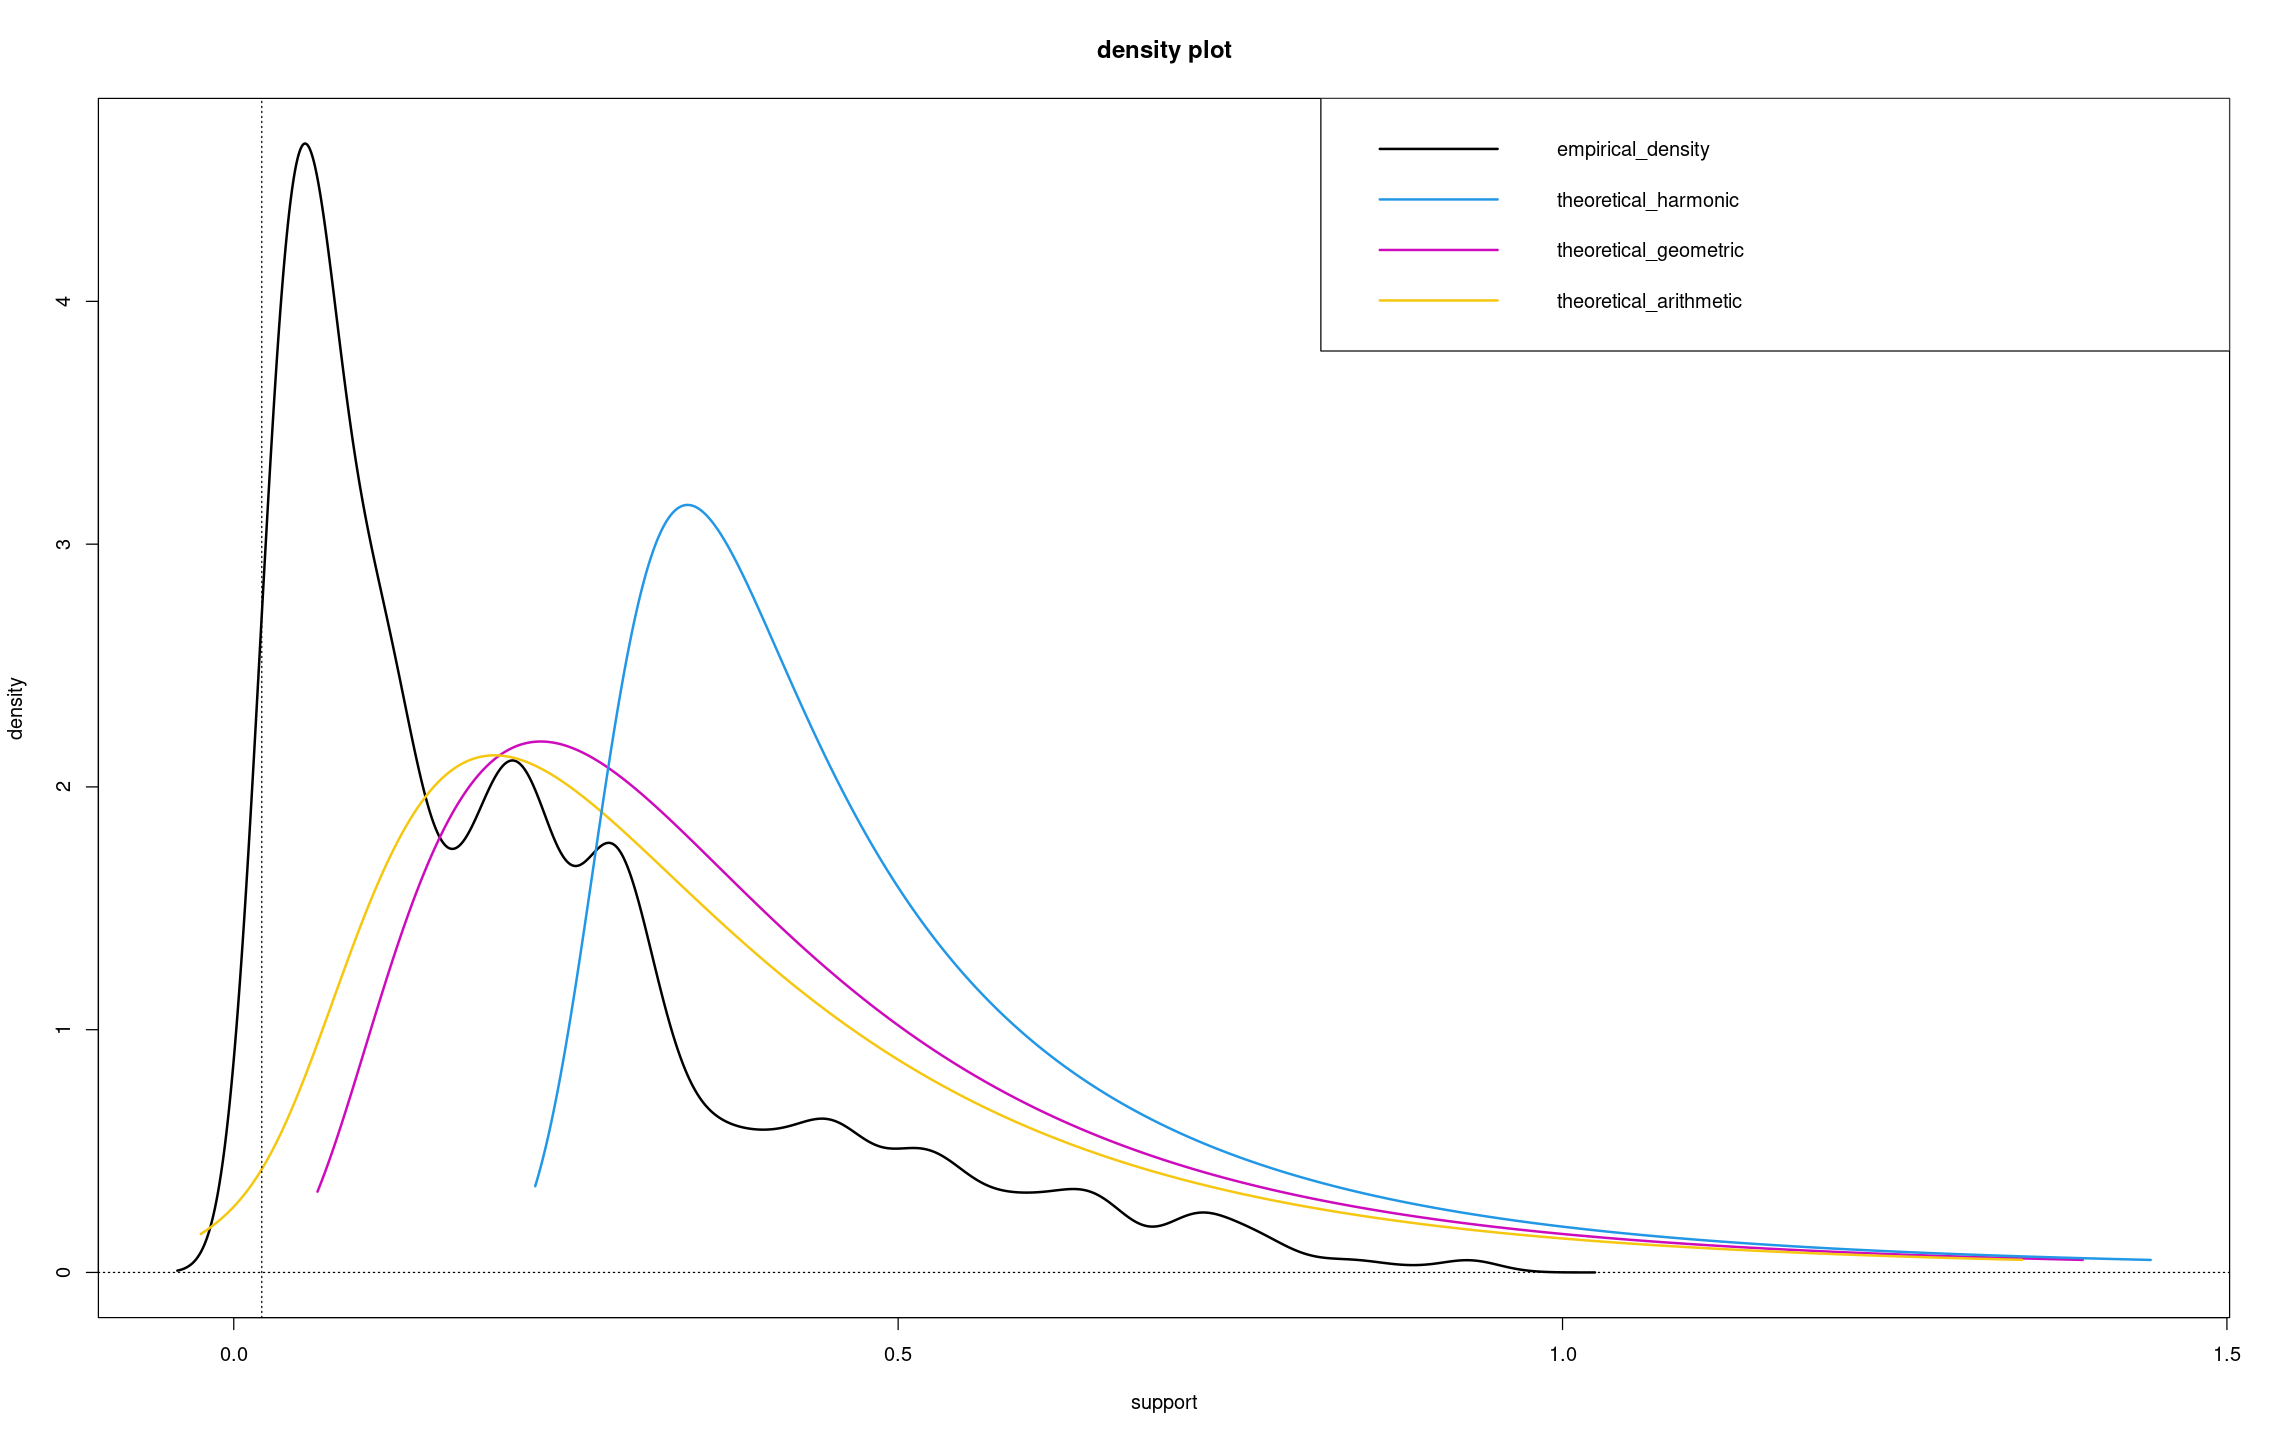

In [94]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

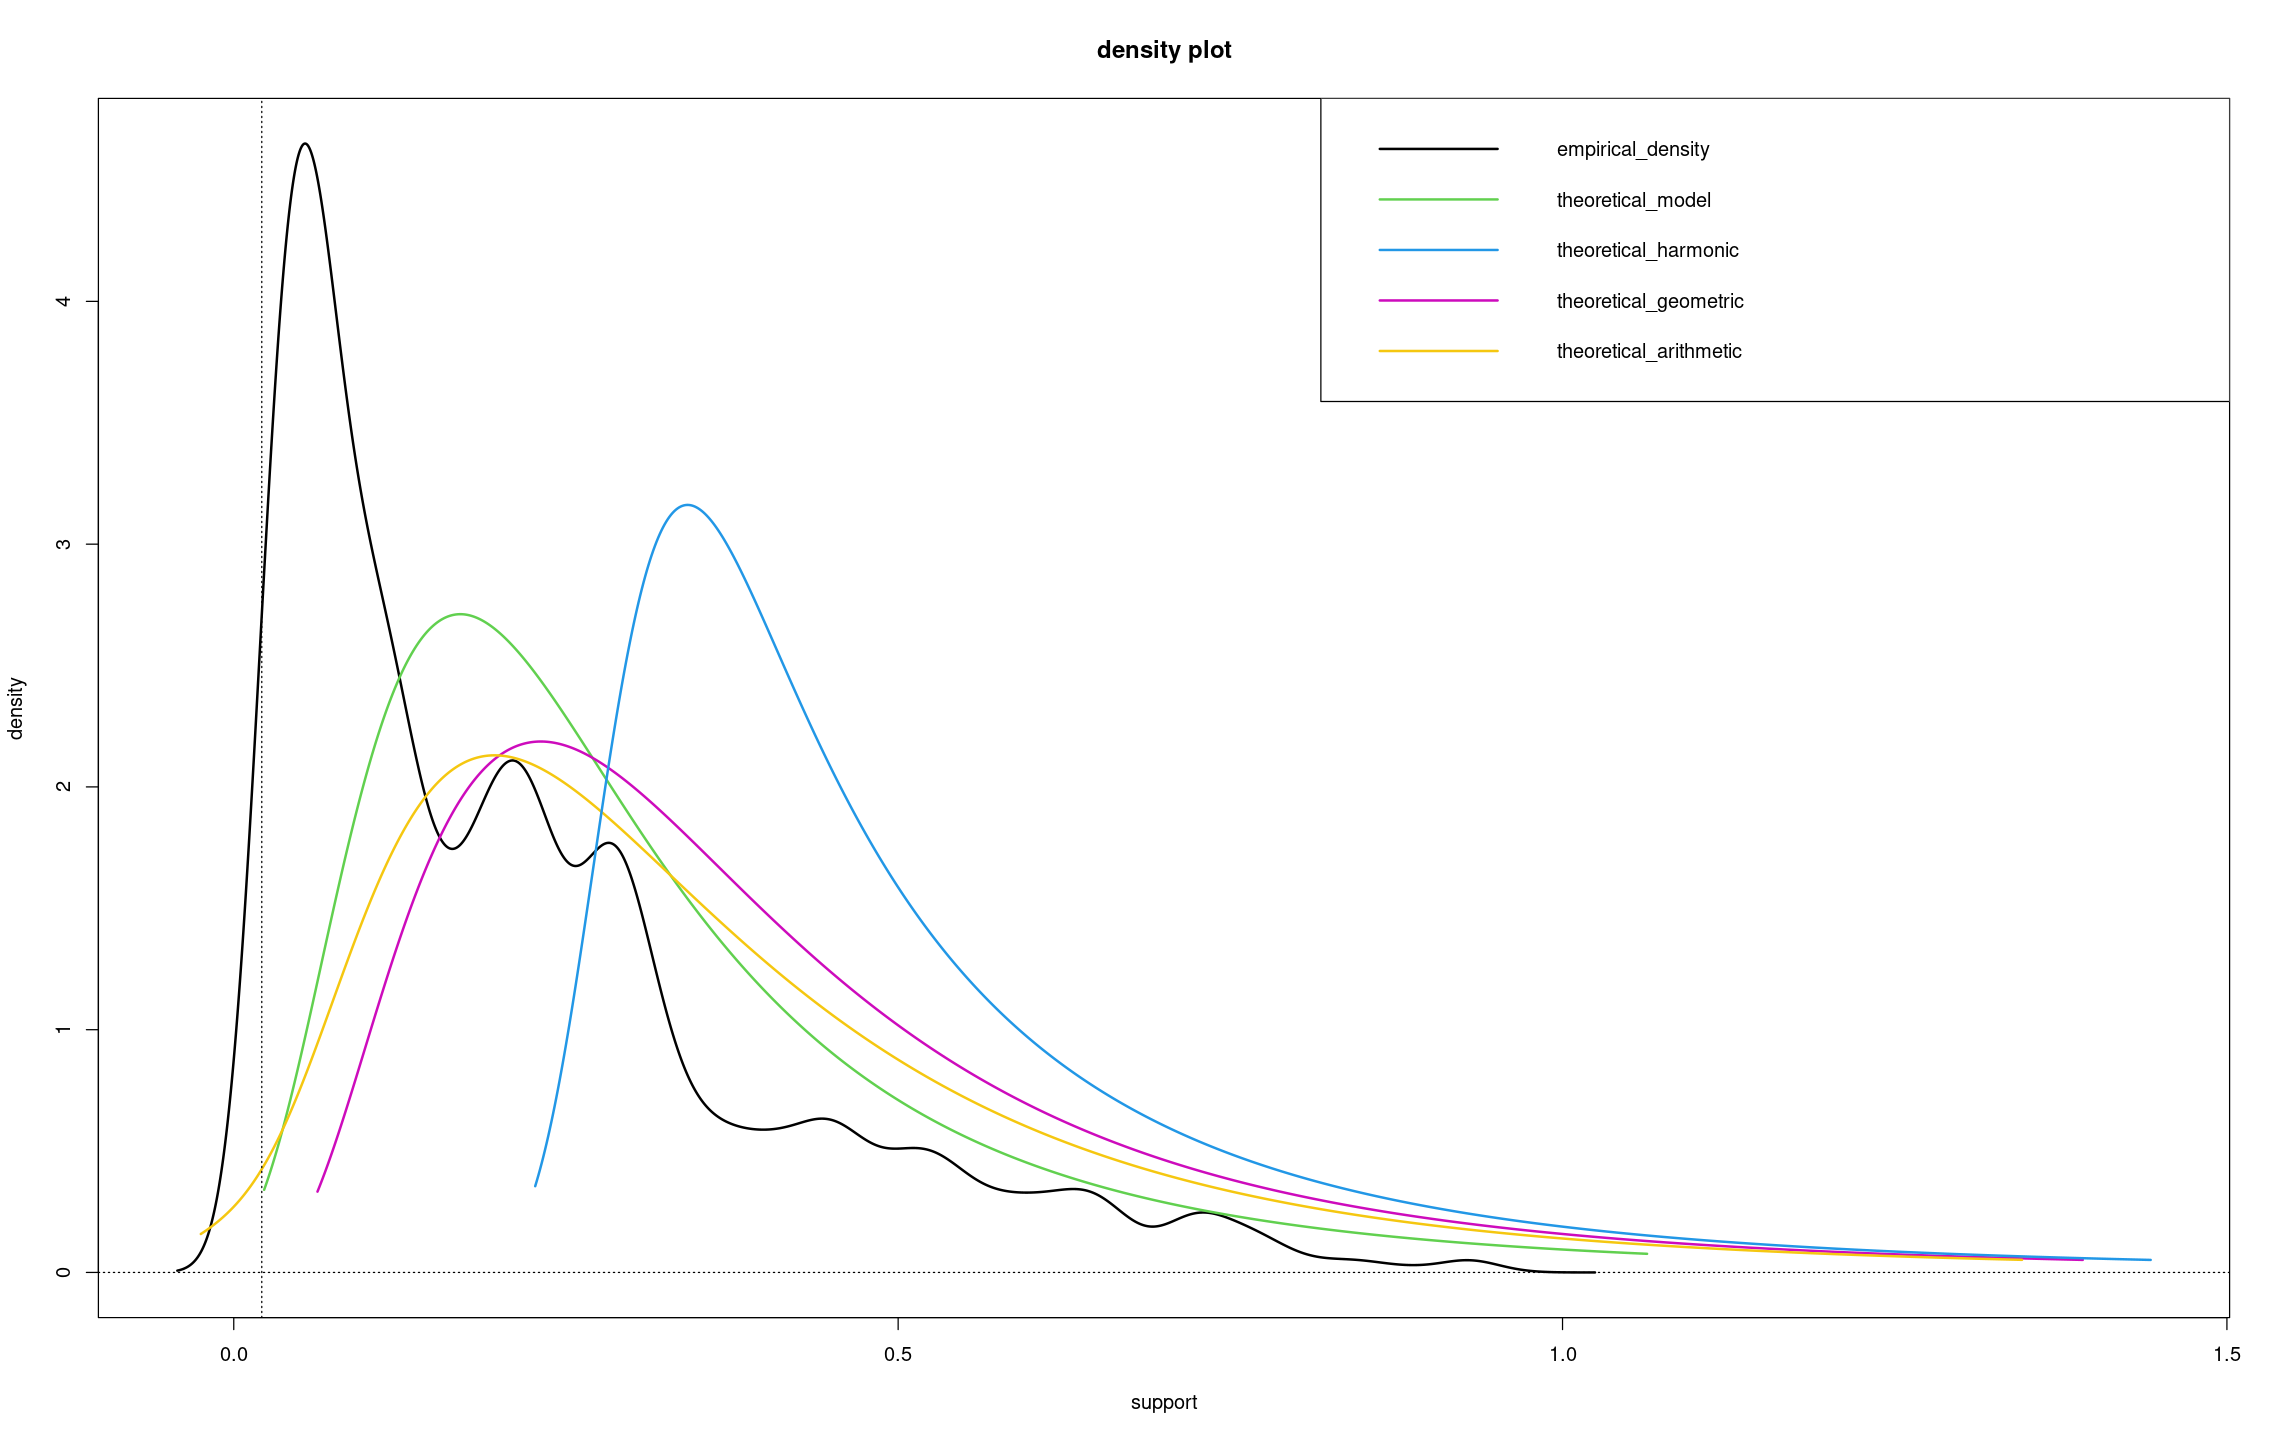

In [96]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

# Quantiles

## Quantile order: alpha = n^(-1)

In [97]:
n <- length(x)

alpha <- n^(-1)

print(alpha)

[1] 4.377133853e-05


## Quantiles vs covariates

In [98]:
partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates

partial_data_covariates_variable <- partial_data_covariates |> select(all_of(selected_model_variable))

partial_data_covariates_variable

horizontal_right
<dbl>
-0.2629700568516
-0.2629700568516
0.6544935635468
-0.2629700568516
0.5234273320613
0.2612948690903
0.3923611005758
0.3923611005758
0.5234273320613


In [99]:
range(partial_data_covariates_variable)

[1] -2.097897298  5.635010360

In [100]:
variable_values <- seq(from = min(partial_data_covariates_variable),
                       to = max(partial_data_covariates_variable),
                       length.out = 100)

new_covariates_values <- data.frame(variable_values)

names(new_covariates_values) <- selected_model_variable

new_covariates_values

horizontal_right
<dbl>
-2.09789729765
-2.01978711929
-1.94167694093
-1.86356676257
-1.78545658421
-1.70734640585
-1.62923622749
-1.55112604913
-1.47301587077


In [101]:
quantiles_new_covariates_values_list <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                                           alpha = alpha,
                                                                                           data = new_covariates_values,
                                                                                           do.ci = FALSE,
                                                                                           confidence_level = 0.95,
                                                                                           kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                                           iterations = 20)

quantiles_new_covariates_values <- sapply(quantiles_new_covariates_values_list, function(quantile){
  c("lower_bound" = quantile$smalest_lower_ci_bound, 
    "estimate" = quantile$gev_mixture_model_quantile, 
    "upper_bound" = quantile$largest_upper_ci_bound)
})

quantiles_new_covariates_values <- data.frame(t(quantiles_new_covariates_values))

quantiles_new_covariates_values

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
covariates_1,2.006206080,34.72977721,207.4223021
covariates_2,2.004843030,34.72958200,207.4221068
covariates_3,2.003479980,34.72928857,207.4219114
covariates_4,2.002116930,34.72909339,207.4217161
covariates_5,2.000753880,34.72889822,207.4215208
covariates_6,1.999390830,34.72870306,207.4213254
covariates_7,1.998027781,34.72850791,207.4211301
covariates_8,1.996664731,34.72831277,207.4209347
covariates_9,1.995301681,34.72801940,207.4207394


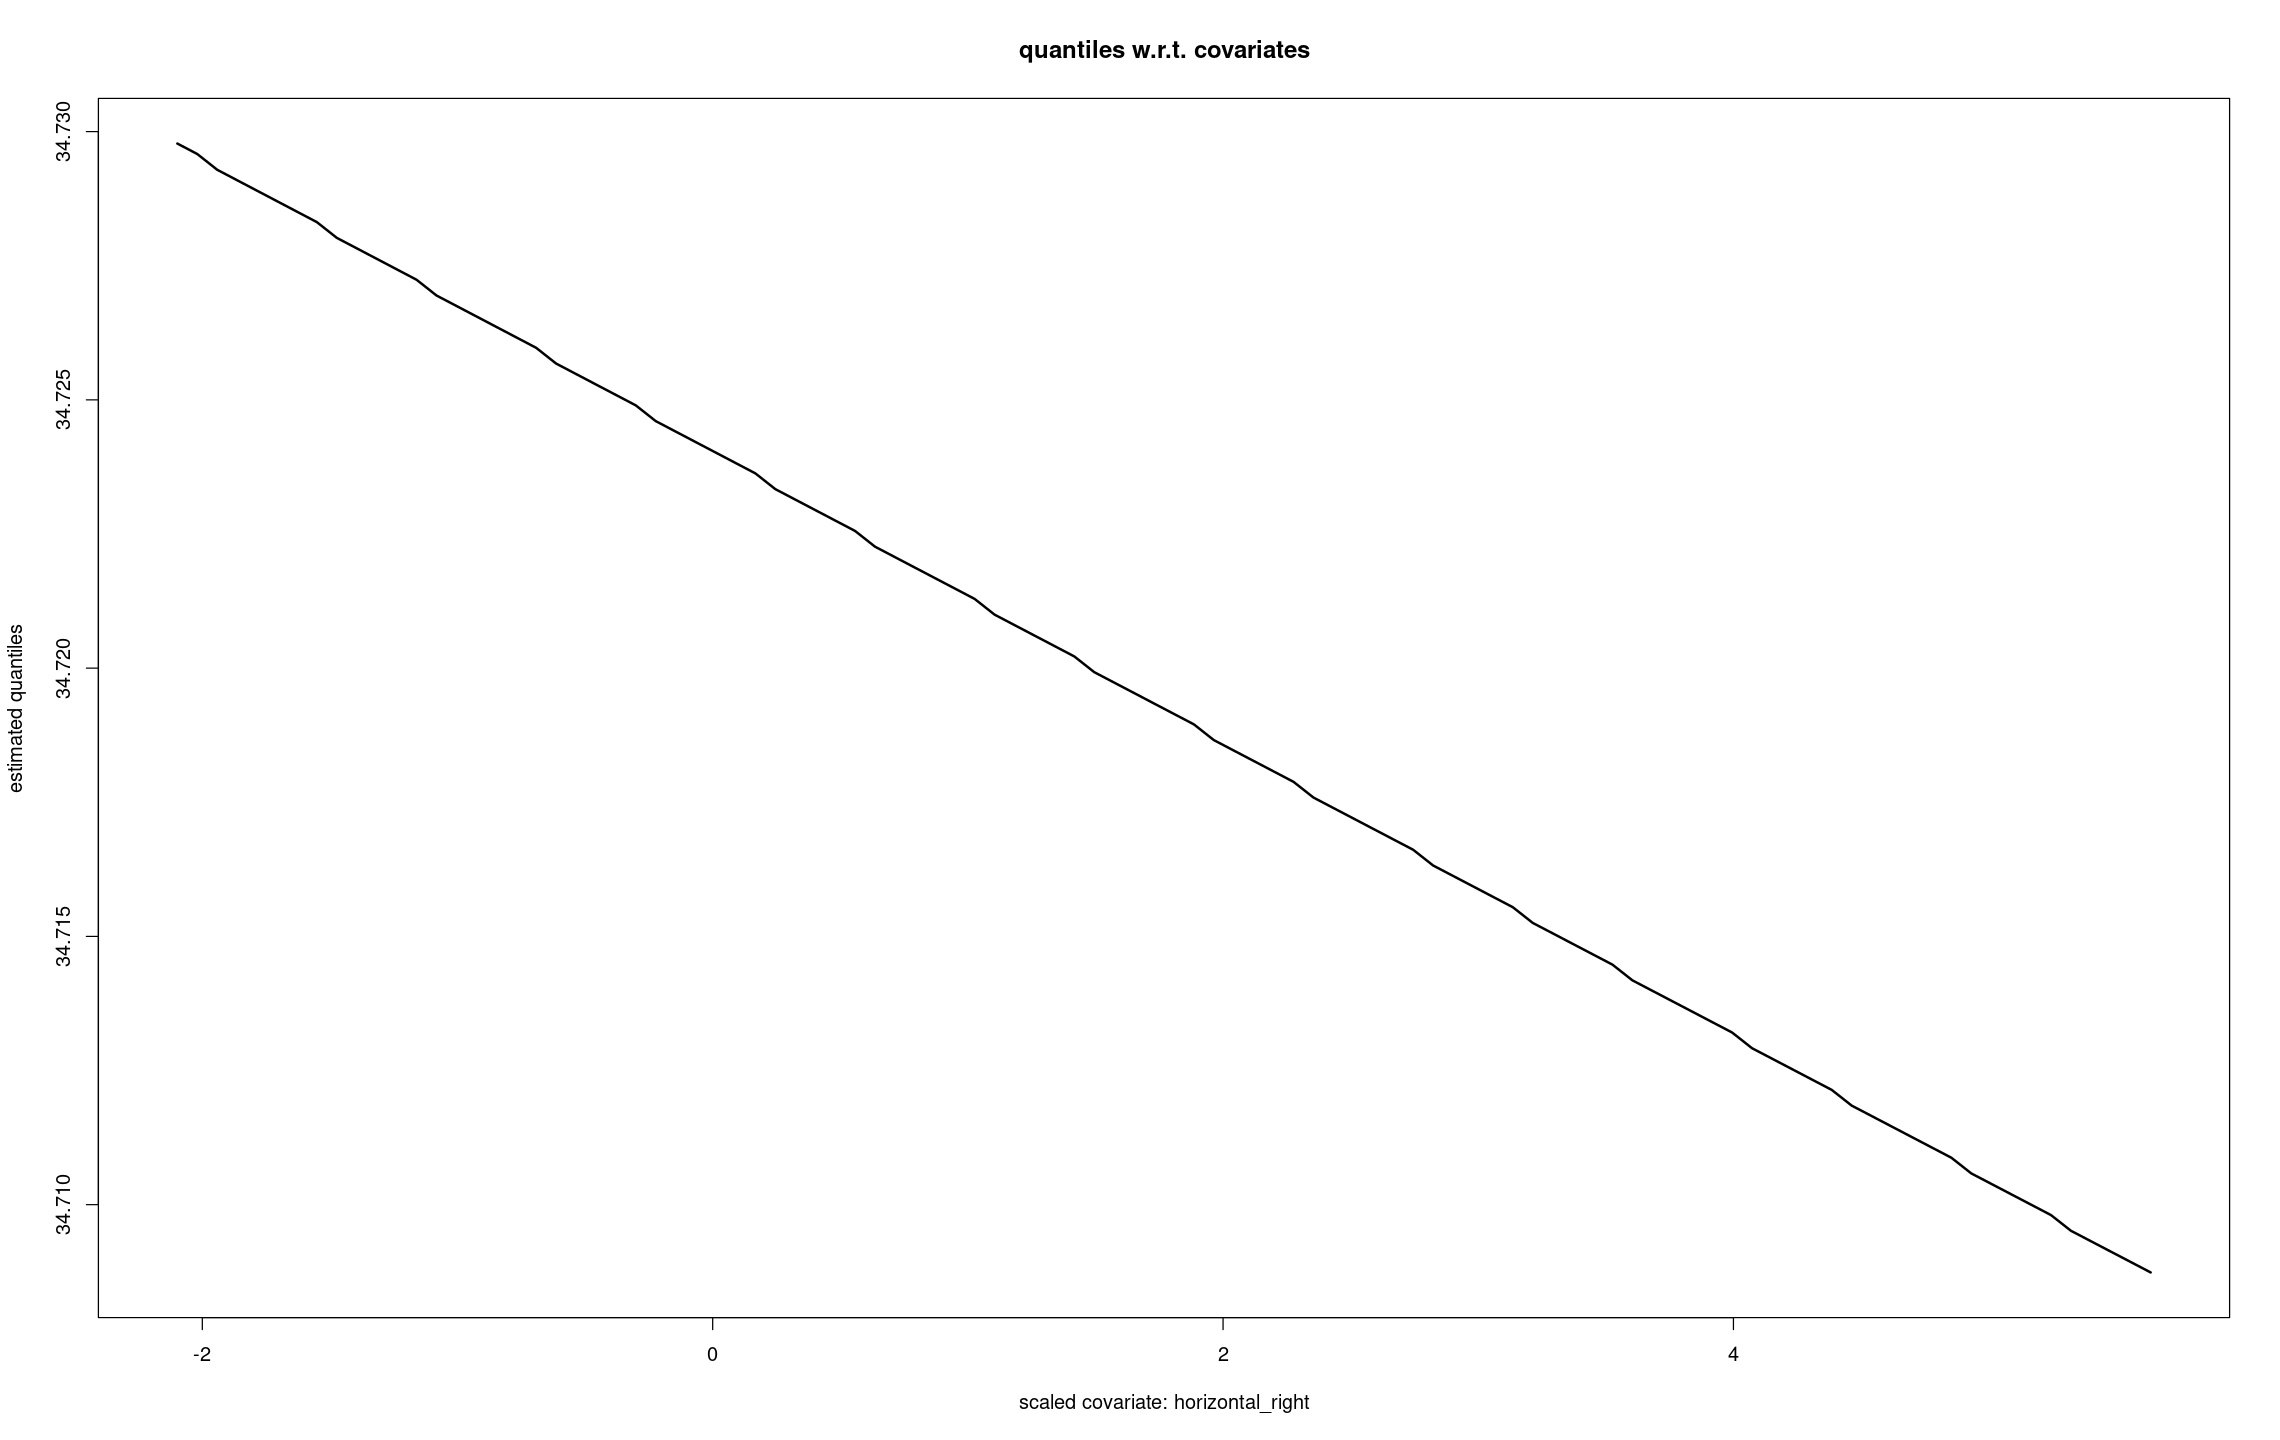

In [102]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = new_covariates_values[, selected_model_variable], 
        y = quantiles_new_covariates_values$estimate,
        type = "l",
        lty = 1,
        lwd = 2,
        main = "quantiles w.r.t. covariates",
        xlab = paste("scaled covariate:", selected_model_variable),
        ylab = "estimated quantiles")


In [136]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# matplot(x = new_covariates_values[, selected_model_variable], 
#         y = quantiles_new_covariates_values,
#         type = "l",
#         lty = 1,
#         lwd = 2,
#         main = "quantiles w.r.t. covariates",
#         xlab = paste("scaled covariate:", selected_model_variable),
#         ylab = "estimated quantiles")
# 
# legend("topleft", legend = c("lower_bound", "estimate", "upper_bound"), col = 1:3, lty = 1, lwd = 2, horiz = FALSE, bty = "n")

## Custom quantile

In [103]:
true_quantile <- NULL

print(true_quantile)

NULL


In [104]:
custom_covariates_scaled <- data.frame("var" = 4)

names(custom_covariates_scaled) <- selected_model_variable

custom_covariates_scaled

horizontal_right
<dbl>
4


In [105]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = custom_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

,location,scale,shape
,<dbl>,<dbl>,<dbl>
3,0.95013357260,0.5478074364,0.53697794395
4,0.76669252102,0.4455288702,0.53088322326
5,0.68986633172,0.4062598891,0.53363501231
6,0.62172746506,0.3679439611,0.53103171472
7,0.66259145565,0.3879573221,0.52965578166
10,0.57317839113,0.3389900696,0.52471570644
12,0.51494322532,0.3040003416,0.51434245201
13,0.49938028487,0.2968487250,0.51520736695
16,0.44541032517,0.2655979074,0.50284654566


In [106]:
# index <- which.max(x)
# 
# new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)
# 
# new_data_covariates_scaled |> select(all_of(selected_model_variable))

In [107]:
# several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models
# 
# predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
#                                                                        data = new_data_covariates_scaled,
#                                                                        use_extremal_index = TRUE,
#                                                                        normalize_parameters = TRUE)
# 
# do.call(rbind, predicted_parameters)

In [108]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = custom_covariates_scaled,
                                                                        do.ci = TRUE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,147.5195845458,207.407052421,267.294520297
4,108.0203956500,161.072043775,214.123691901
5,94.5127012421,150.150760018,205.788818794
6,79.3302099029,133.430123231,187.530036560
7,78.3797190312,139.464800043,200.549881055
10,56.3165968878,116.682817649,177.049038410
12,42.3704661546,96.254841602,150.139217049
13,39.1809018112,94.649514961,150.118128112
16,28.2591404237,76.794212818,125.329285213


In [109]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = custom_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,147.5195845458,207.407052421,267.294520297
4,108.0203956500,161.072043775,214.123691901
5,94.5127012421,150.150760018,205.788818794
6,79.3302099029,133.430123231,187.530036560
7,78.3797190312,139.464800043,200.549881055
10,56.3165968878,116.682817649,177.049038410
12,42.3704661546,96.254841602,150.139217049
13,39.1809018112,94.649514961,150.118128112
16,28.2591404237,76.794212818,125.329285213


In [110]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = custom_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,147.5195845458,207.407052421,267.294520297
4,108.0203956500,161.072043775,214.123691901
5,94.5127012421,150.150760018,205.788818794
6,79.3302099029,133.430123231,187.530036560
7,78.3797190312,139.464800043,200.549881055
10,56.3165968878,116.682817649,177.049038410
12,42.3704661546,96.254841602,150.139217049
13,39.1809018112,94.649514961,150.118128112
16,28.2591404237,76.794212818,125.329285213


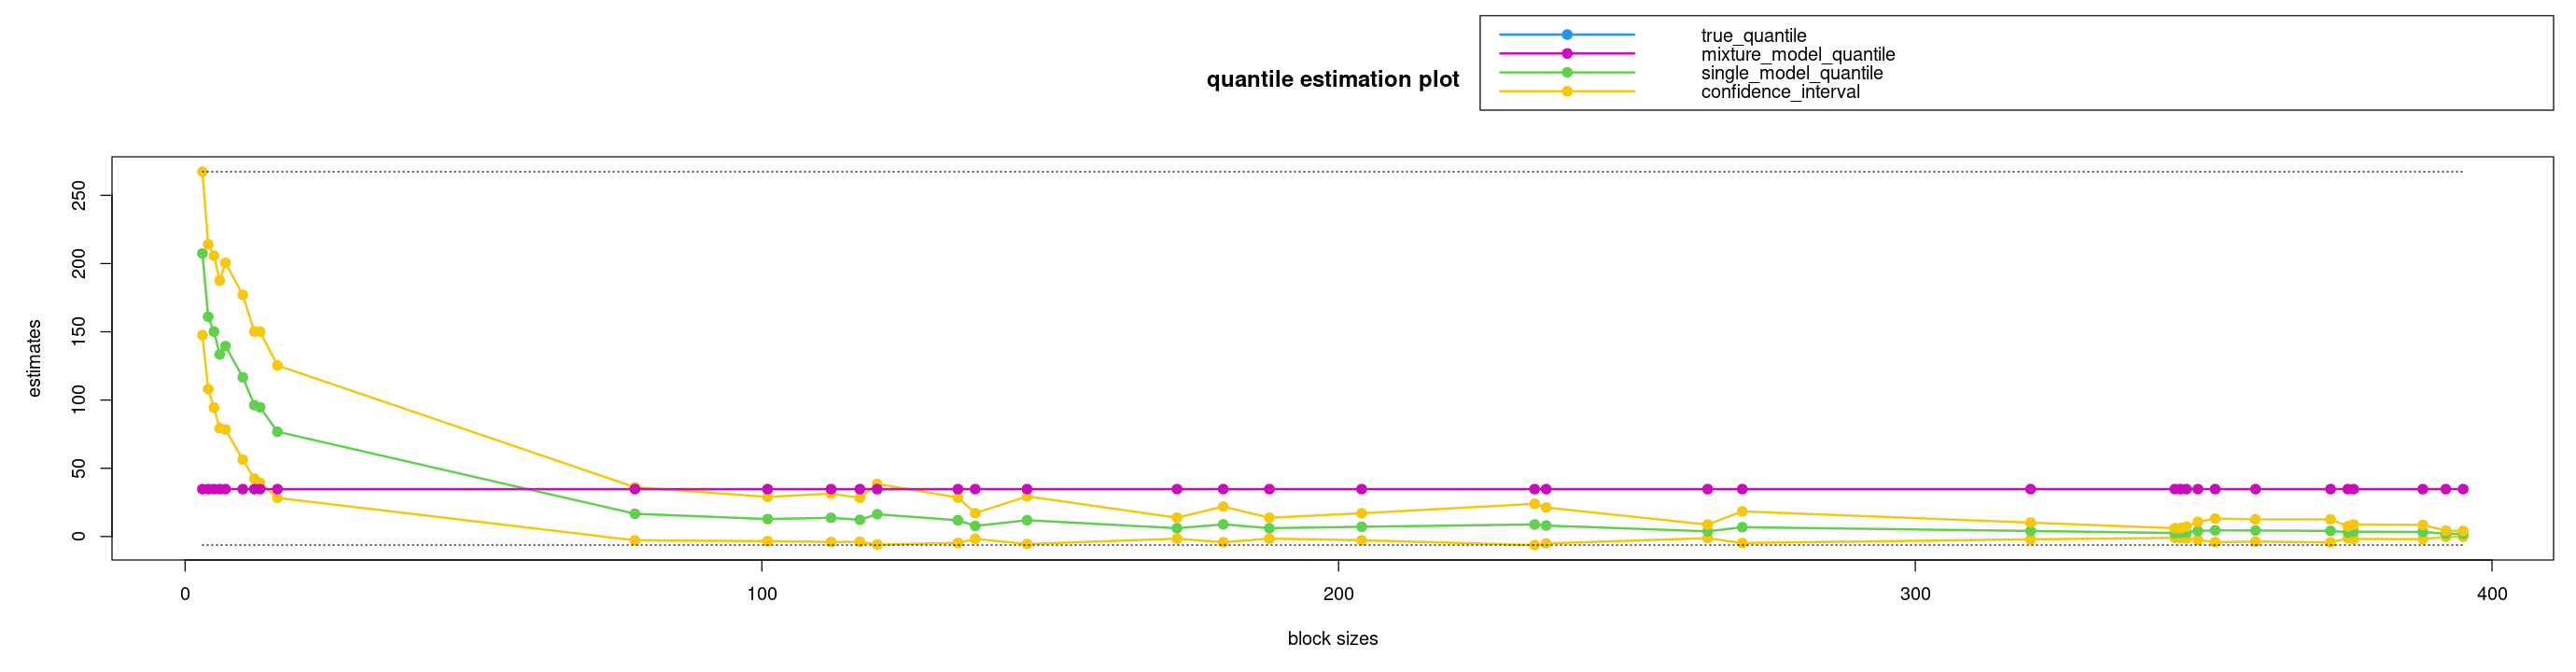

In [111]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = custom_covariates_scaled,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = TRUE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")


# UDF GEV mixture model

## Formulation

In [116]:
# response variable
x <- data_object$response

In [109]:
# list of potential covariates
data_covariates <- data_object$predictors

names(data_covariates)

[1] "velocity"              "object"                "area"                 
 [4] "horizontal_left"       "horizontal_right"      "vertical_down"        
 [7] "vertical_up"           "name_airplane"         "name_bench"           
[10] "name_bench..group."    "name_bicycle"          "name_bird"            
[13] "name_bird..group."     "name_boat"             "name_bus"             
[16] "name_car"              "name_car..group."      "name_dog"             
[19] "name_electric.pole"    "name_fence"            "name_fire.hydrant"    
[22] "name_gas.station"      "name_helicopter"       "name_house"           
[25] "name_house..group."    "name_motorcycle"       "name_parking.meter"   
[28] "name_person"           "name_person..group."   "name_scooter"         
[31] "name_special.building" "name_stop.sign"        "name_street.light"    
[34] "name_tenement"         "name_traffic.light"    "name_traffic.sign"    
[37] "name_train"            "name_tree"             "name_tree..group."    
[40] "name_truck"            "name_tunnel"           "name_tunnel.entrance"

In [122]:
# model specification
custom_model <- list("location.fun" = ~object + velocity + name_tenement + name_tree, "scale.fun" = ~1, "shape.fun" = ~1)

custom_model

$location.fun
~object + velocity + name_tenement + name_tree

$scale.fun
~1

$shape.fun
~1


## Hyperparameters

In [123]:
use.phi <- TRUE
nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(y)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

## Estimation

In [124]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
                                                                    data = data_covariates,
                                                                    location.fun = as.formula(custom_model$location.fun),
                                                                    scale.fun = as.formula(custom_model$scale.fun),
                                                                    shape.fun = as.formula(custom_model$shape.fun),
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [125]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [126]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,mu2,mu3,mu4,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
125,0.5498217215,-0.06495010090,0.11206784636,0.0222596780123,0.0063546724027,0.3146182353,0.119816542589
142,0.5794319523,-0.06857984961,0.09834981937,0.0436375688076,-0.0286229460209,0.3318475106,0.089141173680
171,0.6119841809,-0.08053933726,0.13027694782,0.0483674823228,-0.0378462300152,0.3499132445,0.052673222179
185,0.6291050025,-0.05757964672,0.13933366307,-0.0033925731369,-0.0009344572587,0.3706733951,-0.002654848272
188,0.6152114655,-0.06038653655,0.11710365037,0.0172607294911,0.0052882494290,0.3490389287,0.103269346283
193,0.6473761100,-0.02973177513,0.13492019629,-0.0271776323111,-0.0154821129743,0.3815647695,0.026959388838
199,0.6274716757,-0.05592750713,0.10397982014,-0.0089808338459,-0.0019268499014,0.3616253822,0.089278398442
202,0.6476297280,-0.06951062673,0.15913207225,0.0018401055536,0.0042132683073,0.3482320563,0.067523762946
205,0.6809970185,-0.04338143078,0.14289069026,0.0066081019028,-0.0478249147081,0.3878265255,-0.045484291405


In [127]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
125,1.000350123e-04
142,1.300455159e-03
171,2.450857800e-03
185,7.752713450e-03
188,3.971389986e-02
193,1.900665233e-03
199,5.752013205e-03
202,6.452258290e-03
205,1.065372881e-02


In [128]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

366 
 69

In [129]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC       BIC 
 8902.935 14079.719

## Diagnostic

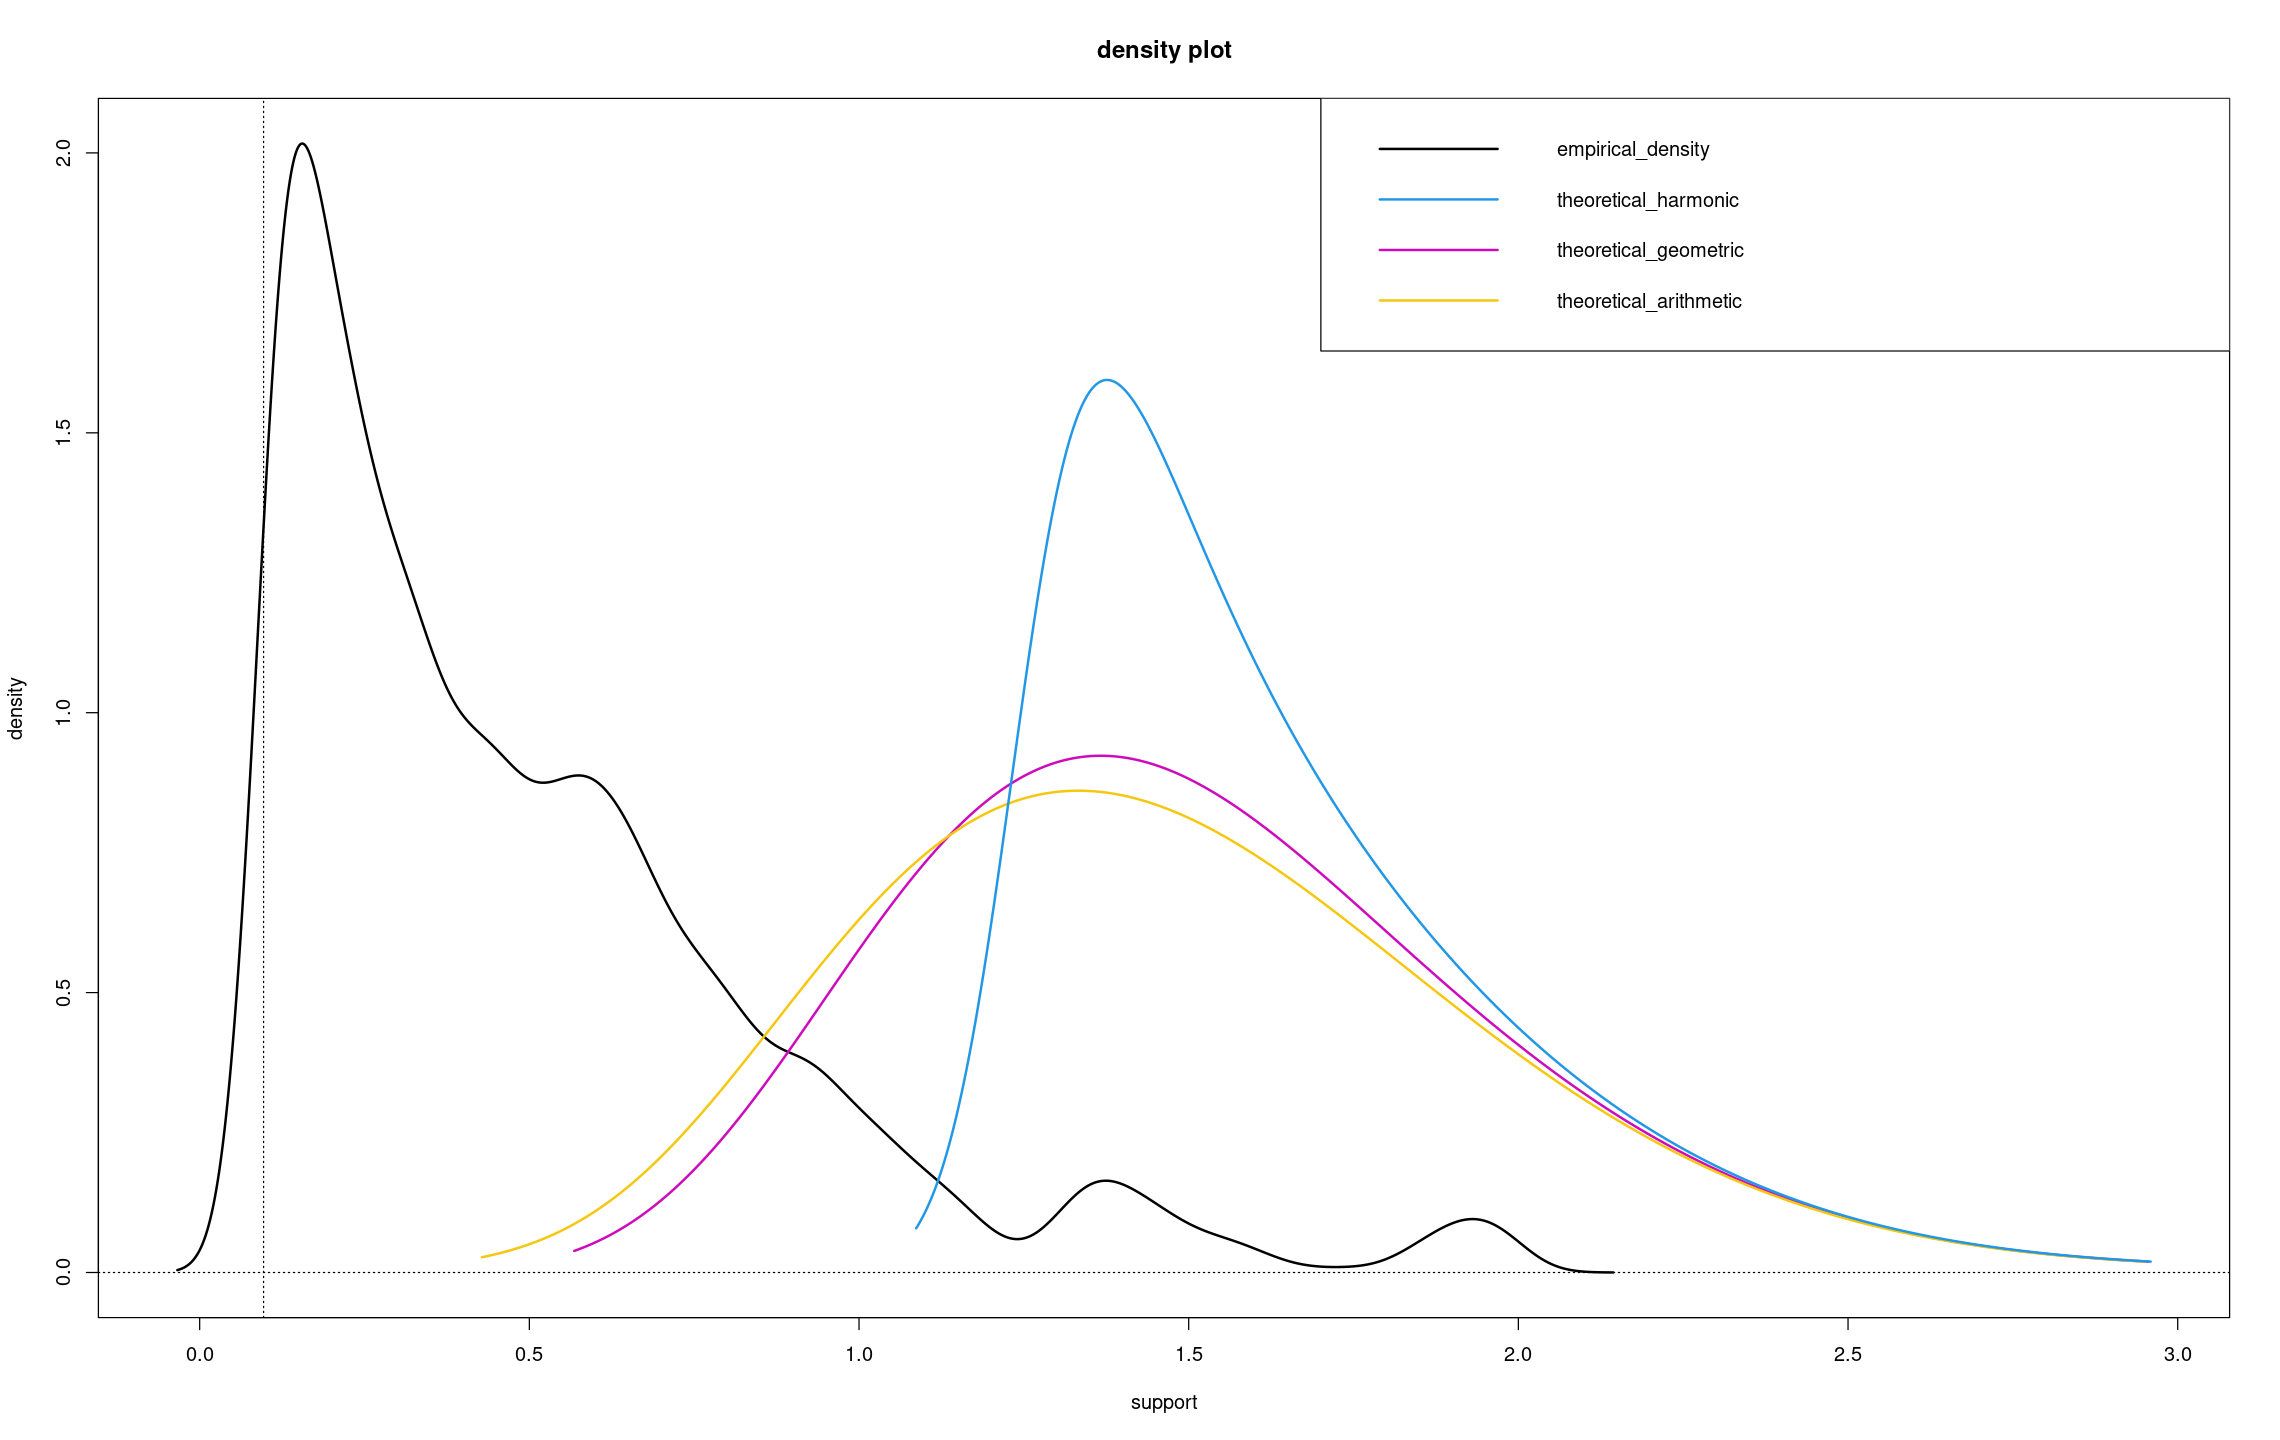

In [134]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

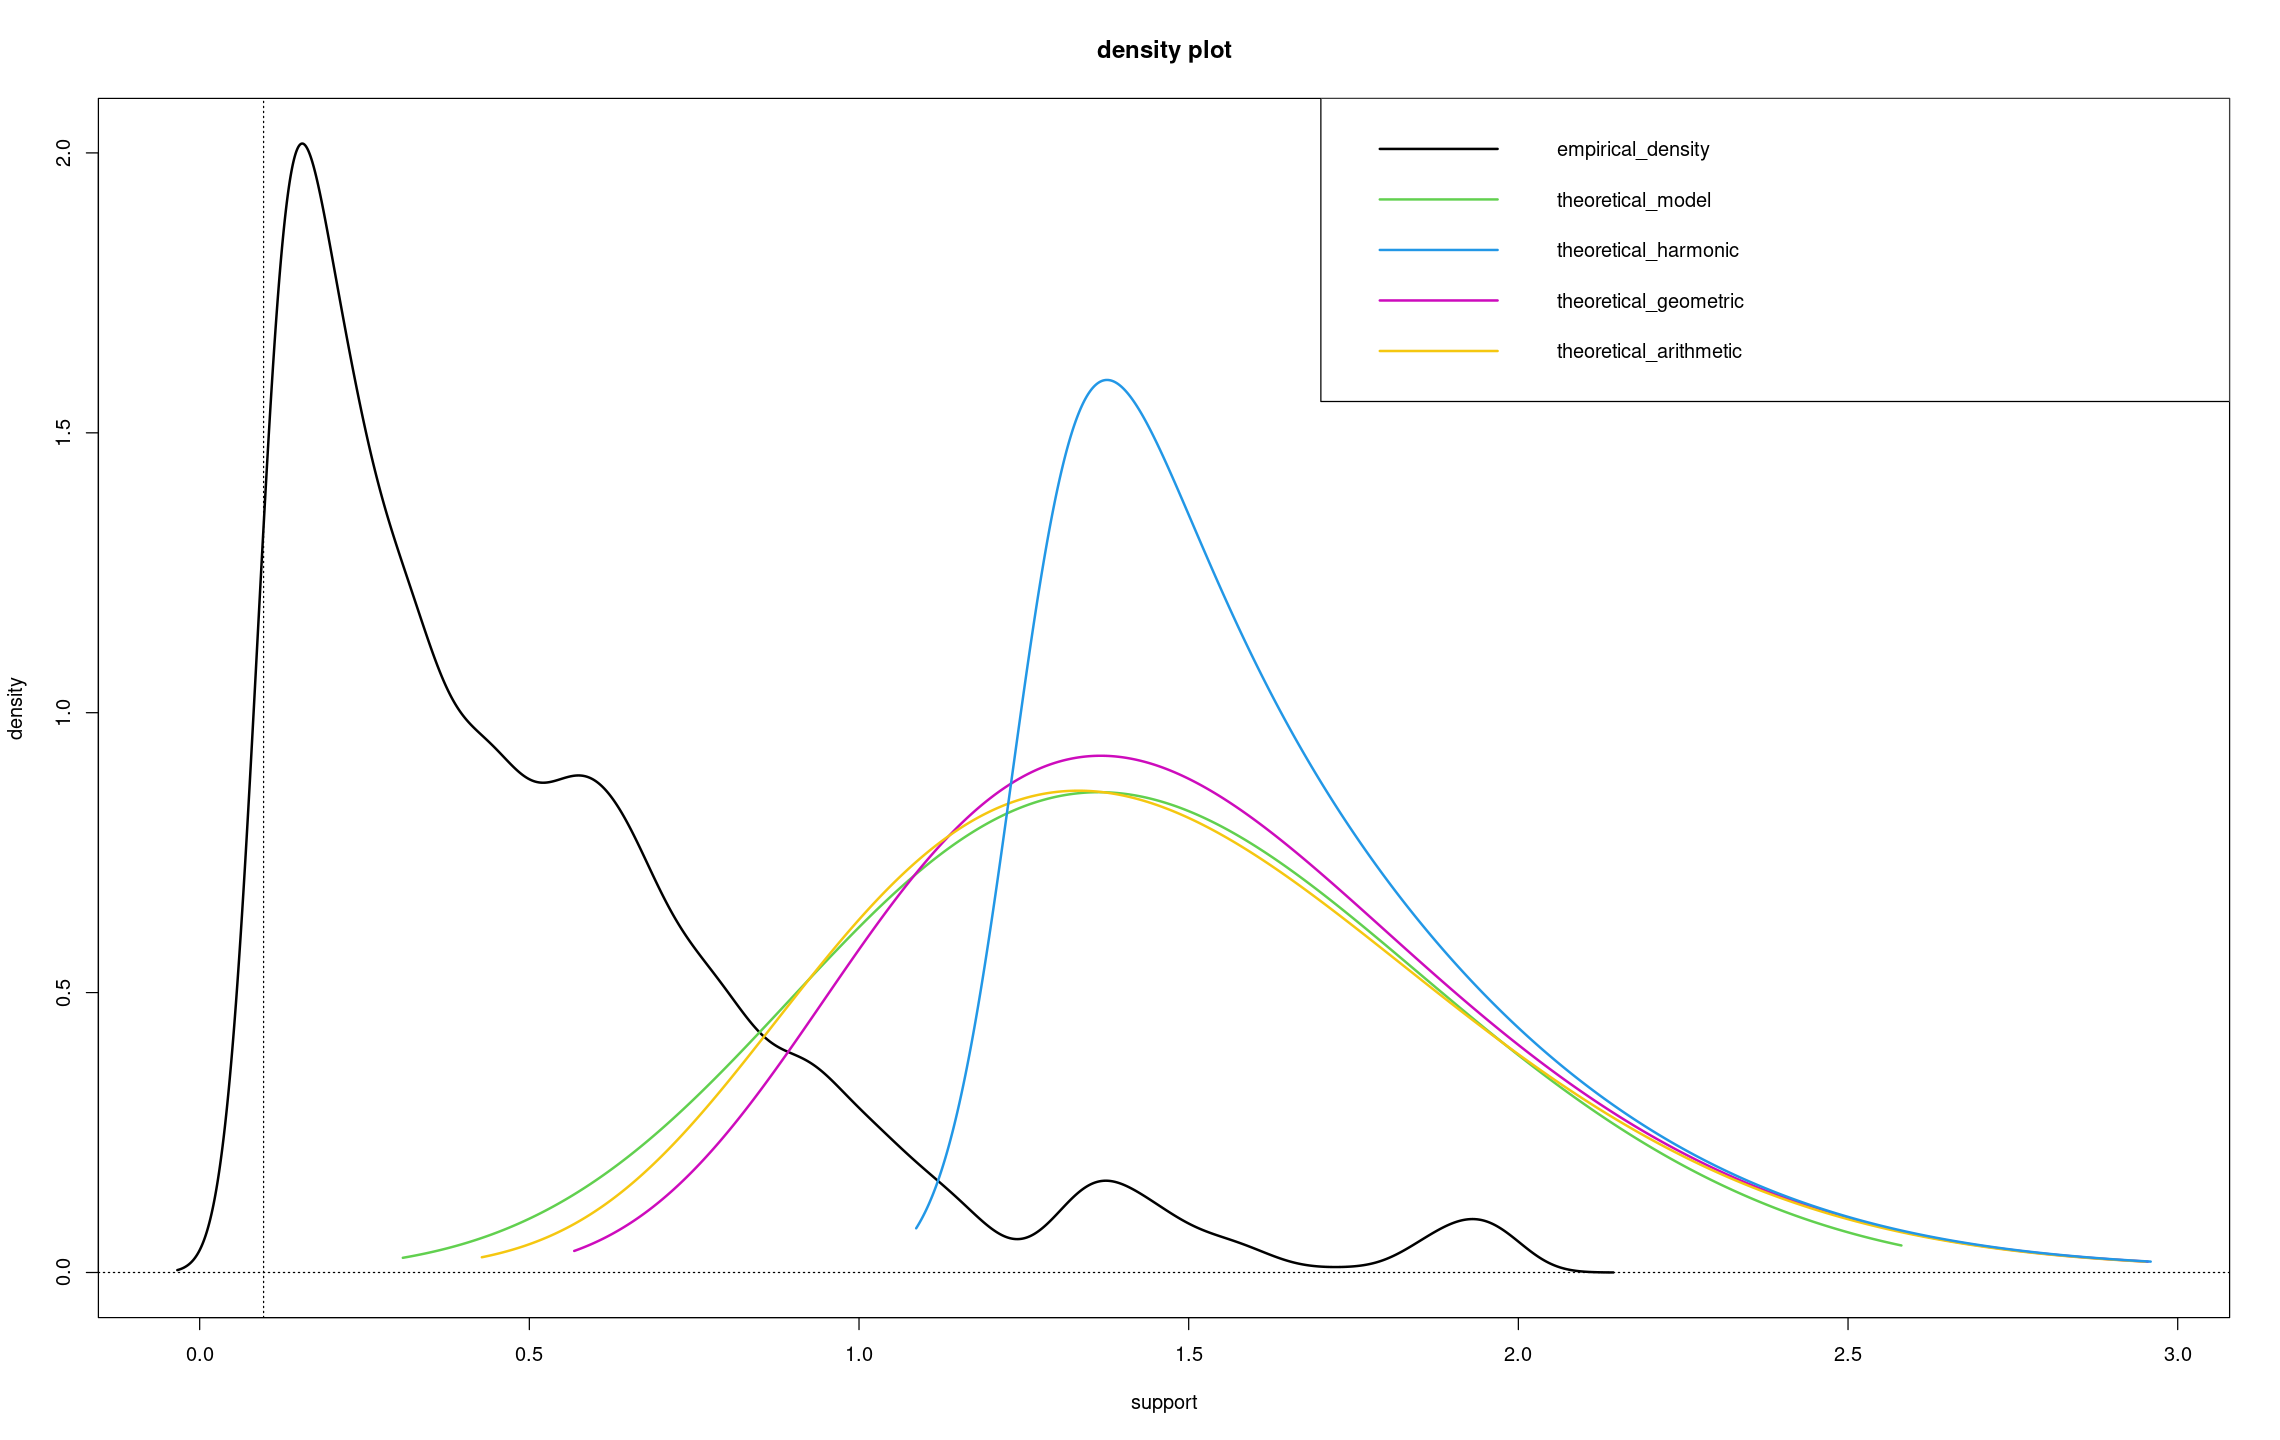

In [135]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

##  Prediction